In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_val_predict, ShuffleSplit

from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor

from xgboost import XGBRFRegressor, XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_log_error

## 2001 

In [265]:
pres_01 = pd.read_csv('presidents/pres_2001.csv')

In [266]:
pres_01

,District,RegVoters,AworiAggrey,BesigyeK,BwesingyeF,ChaapaK,MayanjaK,KagutaM,ValidVotes,InvalidVotes,TotalVotes
0,APAC,241310,2131,123970,1147,681,5443,37133,170505,5604,176109
1,ARUA,321074,4381,99731,2263,1232,4812,72393,184812,9807,194619
2,BUNDIBUGYO,81461,195,2780,144,56,276,39676,43127,1112,44239
3,BUSHENYI,334236,575,43657,870,340,945,212540,258927,3427,262354
4,GULU,250715,3524,108565,1136,714,3471,15320,132730,6076,138806
5,HOIMA,129672,239,8593,221,75,452,79101,88681,1965,90646
6,IGANGA,325880,869,33831,515,195,1452,166403,203265,6442,209707
7,JINJA,223425,973,36889,222,87,834,77929,116934,2487,119421
8,KABALE,235495,215,17020,147,59,327,189731,207499,1855,209354
9,KABAROLE,159369,275,10586,266,39,402,93414,104982,2642,107624


In [267]:
pres_01.dtypes

District        object
RegVoters        int64
AworiAggrey      int64
BesigyeK         int64
BwesingyeF       int64
ChaapaK          int64
MayanjaK         int64
KagutaM          int64
ValidVotes       int64
InvalidVotes     int64
TotalVotes       int64
dtype: object

In [268]:
pres_01['Opp_votes'] = pres_01['ValidVotes'] - pres_01['KagutaM']

In [269]:
pres_01['2001_NRM_score'] = pres_01['KagutaM']/pres_01['ValidVotes']

In [270]:
pres_01

,District,RegVoters,AworiAggrey,BesigyeK,BwesingyeF,ChaapaK,MayanjaK,KagutaM,ValidVotes,InvalidVotes,TotalVotes,Opp_votes,2001_NRM_score
0,APAC,241310,2131,123970,1147,681,5443,37133,170505,5604,176109,133372,0.217782
1,ARUA,321074,4381,99731,2263,1232,4812,72393,184812,9807,194619,112419,0.391712
2,BUNDIBUGYO,81461,195,2780,144,56,276,39676,43127,1112,44239,3451,0.919981
3,BUSHENYI,334236,575,43657,870,340,945,212540,258927,3427,262354,46387,0.820849
4,GULU,250715,3524,108565,1136,714,3471,15320,132730,6076,138806,117410,0.115422
5,HOIMA,129672,239,8593,221,75,452,79101,88681,1965,90646,9580,0.891972
6,IGANGA,325880,869,33831,515,195,1452,166403,203265,6442,209707,36862,0.818651
7,JINJA,223425,973,36889,222,87,834,77929,116934,2487,119421,39005,0.666436
8,KABALE,235495,215,17020,147,59,327,189731,207499,1855,209354,17768,0.914371
9,KABAROLE,159369,275,10586,266,39,402,93414,104982,2642,107624,11568,0.889810


In [271]:
pres_01.columns

Index(['District', 'RegVoters', 'AworiAggrey', 'BesigyeK', 'BwesingyeF',
       'ChaapaK', 'MayanjaK', 'KagutaM', 'ValidVotes', 'InvalidVotes',
       'TotalVotes', 'Opp_votes', '2001_NRM_score'],
      dtype='object')

In [272]:
pres_01 = pres_01.drop(['AworiAggrey','BesigyeK','BwesingyeF', 'ChaapaK','MayanjaK'], axis=1)

In [273]:
pres_01

,District,RegVoters,KagutaM,ValidVotes,InvalidVotes,TotalVotes,Opp_votes,2001_NRM_score
0,APAC,241310,37133,170505,5604,176109,133372,0.217782
1,ARUA,321074,72393,184812,9807,194619,112419,0.391712
2,BUNDIBUGYO,81461,39676,43127,1112,44239,3451,0.919981
3,BUSHENYI,334236,212540,258927,3427,262354,46387,0.820849
4,GULU,250715,15320,132730,6076,138806,117410,0.115422
5,HOIMA,129672,79101,88681,1965,90646,9580,0.891972
6,IGANGA,325880,166403,203265,6442,209707,36862,0.818651
7,JINJA,223425,77929,116934,2487,119421,39005,0.666436
8,KABALE,235495,189731,207499,1855,209354,17768,0.914371
9,KABAROLE,159369,93414,104982,2642,107624,11568,0.889810


### correlation between features

<AxesSubplot:>

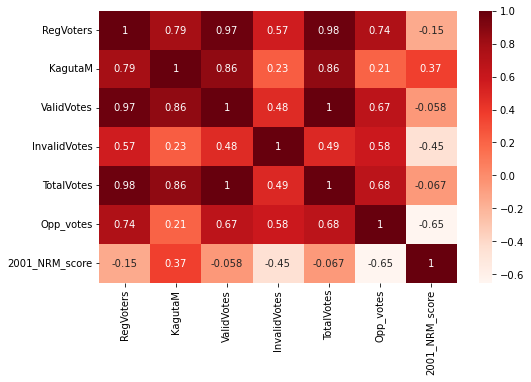

In [274]:
plt.figure(figsize=(8,5))
sns.heatmap(pres_01.corr(), cmap=plt.cm.Reds, annot=True)

#### Total votes, Registered voters, Valid votes, and Kaguta votes are highly correlated

In [275]:
# drop Total votes and Registered voters
pres_01 = pres_01.drop(['TotalVotes','RegVoters', 'ValidVotes'], axis=1)

In [276]:
pres_01.corr()

,KagutaM,InvalidVotes,Opp_votes,2001_NRM_score
KagutaM,1.000000,0.231077,0.205796,0.365060
InvalidVotes,0.231077,1.000000,0.583272,-0.453832
Opp_votes,0.205796,0.583272,1.000000,-0.651041
2001_NRM_score,0.365060,-0.453832,-0.651041,1.000000


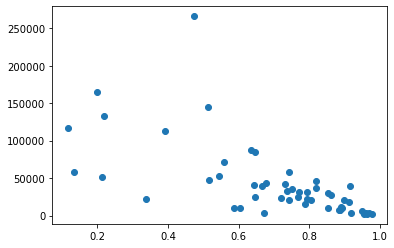

In [277]:
plt.scatter(pres_01['2001_NRM_score'], pres_01['Opp_votes'])

In [278]:
pres_01.head()

,District,KagutaM,InvalidVotes,Opp_votes,2001_NRM_score
0,APAC,37133,5604,133372,0.217782
1,ARUA,72393,9807,112419,0.391712
2,BUNDIBUGYO,39676,1112,3451,0.919981
3,BUSHENYI,212540,3427,46387,0.820849
4,GULU,15320,6076,117410,0.115422


In [279]:
pres_01.columns = ['District','2001_NRMVotes', '2001_IV', '2001_OV', '2001_NRM_Score']

In [280]:
pres_01.head()

,District,2001_NRMVotes,2001_IV,2001_OV,2001_NRM_Score
0,APAC,37133,5604,133372,0.217782
1,ARUA,72393,9807,112419,0.391712
2,BUNDIBUGYO,39676,1112,3451,0.919981
3,BUSHENYI,212540,3427,46387,0.820849
4,GULU,15320,6076,117410,0.115422


In [281]:
pres_01 = pres_01.sort_values(by=['District'])

In [282]:
pres_01

,District,2001_NRMVotes,2001_IV,2001_OV,2001_NRM_Score
39,ADJUMAN,14944,1204,9830,0.603213
0,APAC,37133,5604,133372,0.217782
1,ARUA,72393,9807,112419,0.391712
40,BUGIRI,82433,4324,24977,0.767461
2,BUNDIBUGYO,39676,1112,3451,0.919981
3,BUSHENYI,212540,3427,46387,0.820849
41,BUSIA,45670,2526,24901,0.647150
4,GULU,15320,6076,117410,0.115422
5,HOIMA,79101,1965,9580,0.891972
6,IGANGA,166403,6442,36862,0.818651


In [283]:
pres_01['District'].replace({"ADJUMAN": "ADJUMANI"}, inplace=True)

In [284]:
pres_01

,District,2001_NRMVotes,2001_IV,2001_OV,2001_NRM_Score
39,ADJUMANI,14944,1204,9830,0.603213
0,APAC,37133,5604,133372,0.217782
1,ARUA,72393,9807,112419,0.391712
40,BUGIRI,82433,4324,24977,0.767461
2,BUNDIBUGYO,39676,1112,3451,0.919981
3,BUSHENYI,212540,3427,46387,0.820849
41,BUSIA,45670,2526,24901,0.647150
4,GULU,15320,6076,117410,0.115422
5,HOIMA,79101,1965,9580,0.891972
6,IGANGA,166403,6442,36862,0.818651


In [285]:
pres_01.corr()

,2001_NRMVotes,2001_IV,2001_OV,2001_NRM_Score
2001_NRMVotes,1.000000,0.231077,0.205796,0.365060
2001_IV,0.231077,1.000000,0.583272,-0.453832
2001_OV,0.205796,0.583272,1.000000,-0.651041
2001_NRM_Score,0.365060,-0.453832,-0.651041,1.000000


## 2006 presidents

In [ ]:
pres_06 = pd.read_csv('presidents/pres_2006.csv')

In [ ]:
pres_06

In [260]:
pres_06.dtypes

District         object
Reg. Voters       int64
Abed Bwanika      int64
Besigye Kizza     int64
Obote Kalule      int64
Ssebaana John     int64
Yoweri Kaguta     int64
Valid Votes       int64
Invalid Votes     int64
Total Votes       int64
dtype: object

In [261]:
pres_06['2006_NRM_Score'] = pres_06['Yoweri Kaguta']/pres_06['Valid Votes']

In [262]:
pres_06['2006_OV'] = pres_06['Valid Votes'] - pres_06['Yoweri Kaguta']

In [263]:
pres_06

,District,Reg. Voters,Abed Bwanika,Besigye Kizza,Obote Kalule,Ssebaana John,Yoweri Kaguta,Valid Votes,Invalid Votes,Total Votes,2006_NRM_Score,2006_OV
0,APAC,240639,3402,117429,11088,3313,25865,161097,10391,171488,0.160555,135232
1,ARUA,281954,4481,104961,2183,4038,68560,184223,11022,195245,0.372158,115663
2,GULU,215953,2412,105314,1427,1802,16866,127821,5631,133452,0.131950,110955
3,KITGUM,115010,1588,54296,1020,1478,13580,71962,3161,75123,0.188711,58382
4,LIRA,247272,3155,123237,11654,3008,12035,153089,11112,164201,0.078614,141054
...,...,...,...,...,...,...,...,...,...,...,...,...
64,KASESE,210826,1715,79268,553,1758,63522,146816,4530,151346,0.432664,83294
65,KIBAALE,180770,591,10577,453,1027,116059,128707,4993,133700,0.901730,12648
66,MASINDI,195112,1428,29615,949,1419,85765,119176,7095,126271,0.719650,33411
67,KAMWENGE,127799,365,8909,101,632,83436,93443,2190,95633,0.892908,10007


In [264]:
pres_06 = pres_06.drop(['Abed Bwanika', 'Besigye Kizza','Obote Kalule', 'Ssebaana John'], axis=1)

<AxesSubplot:>

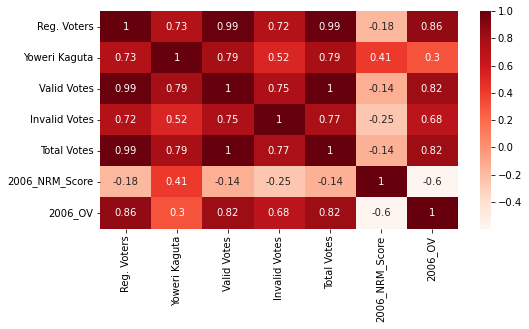

In [265]:
plt.figure(figsize = (8,4))
sns.heatmap(pres_06.corr(), cmap=plt.cm.Reds, annot=True)

### registered voters, valid votes, Total votes are highly correlated to all other features. drop them

In [266]:
pres_06.columns

Index(['District', 'Reg. Voters', 'Yoweri Kaguta', 'Valid Votes',
       'Invalid Votes', 'Total Votes', '2006_NRM_Score', '2006_OV'],
      dtype='object')

In [267]:
pres_06 = pres_06.drop(['Reg. Voters','Valid Votes', 'Total Votes'], axis=1)

In [268]:
pres_06.head()

,District,Yoweri Kaguta,Invalid Votes,2006_NRM_Score,2006_OV
0,APAC,25865,10391,0.160555,135232
1,ARUA,68560,11022,0.372158,115663
2,GULU,16866,5631,0.131950,110955
3,KITGUM,13580,3161,0.188711,58382
4,LIRA,12035,11112,0.078614,141054


In [269]:
pres_06.corr()

,Yoweri Kaguta,Invalid Votes,2006_NRM_Score,2006_OV
Yoweri Kaguta,1.000000,0.521893,0.410004,0.296603
Invalid Votes,0.521893,1.000000,-0.254696,0.683704
2006_NRM_Score,0.410004,-0.254696,1.000000,-0.595628
2006_OV,0.296603,0.683704,-0.595628,1.000000


In [270]:
pres_06 = pres_06.sort_values(by=['District'])

In [271]:
pres_06

,District,Yoweri Kaguta,Invalid Votes,2006_NRM_Score,2006_OV
7,ADJUMANI,11277,1990,0.343937,21511
10,AMOLATAR,7112,715,0.287029,17666
20,AMURIA,7495,1852,0.169885,36623
0,APAC,25865,10391,0.160555,135232
1,ARUA,68560,11022,0.372158,115663
...,...,...,...,...,...
16,SOROTI,17045,4640,0.162225,88025
46,SSEMBABULE,47213,1477,0.775751,13648
28,TORORO,47549,9856,0.432941,62279
48,WAKISO,129524,7646,0.476470,142317


In [272]:
pres_06['District'].isin(pres_01['District']).value_counts()

True     53
False    16
Name: District, dtype: int64

In [273]:
pres_01.shape, pres_06.shape

((53, 5), (69, 5))

In [274]:
pres_06.columns

Index(['District', 'Yoweri Kaguta', 'Invalid Votes', '2006_NRM_Score',
       '2006_OV'],
      dtype='object')

In [275]:
pres_06.columns = ['District','2006_NRMVotes', '2006_IV', '2006_NRM_Score', '2006_OV']

In [276]:
pre_1_6 = pres_06.merge(pres_01,how='left', left_on='District', right_on='District')

In [277]:
pre_1_6.shape

(69, 9)

In [278]:
pre_1_6.head(10)

,District,2006_NRMVotes,2006_IV,2006_NRM_Score,2006_OV,2001_NRMVotes,2001_IV,2001_OV,2001_NRM_Score
0,ADJUMANI,11277,1990,0.343937,21511,14944.0,1204.0,9830.0,0.603213
1,AMOLATAR,7112,715,0.287029,17666,NaN,NaN,NaN,NaN
2,AMURIA,7495,1852,0.169885,36623,NaN,NaN,NaN,NaN
3,APAC,25865,10391,0.160555,135232,37133.0,5604.0,133372.0,0.217782
4,ARUA,68560,11022,0.372158,115663,72393.0,9807.0,112419.0,0.391712
5,BUGIRI,74457,6854,0.636510,42520,82433.0,4324.0,24977.0,0.767461
6,BUKWO,15865,641,0.912253,1526,NaN,NaN,NaN,NaN
7,BUNDIBUGYO,45651,3019,0.772855,13417,39676.0,1112.0,3451.0,0.919981
8,BUSHENYI,176909,8055,0.767328,53643,212540.0,3427.0,46387.0,0.820849
9,BUSIA,44405,3457,0.583593,31684,45670.0,2526.0,24901.0,0.647150


### 2011 presidents


In [279]:
pre_11 = pd.read_csv('presidents/pres_2011.csv')

In [ ]:
pre_11

In [280]:
pre_11['District'] = [i.split(maxsplit=1)[1] for i in pre_11['District']]

In [ ]:
pre_11.head()

In [281]:
pre_11['2011_NRM_Score'] = pre_11['YOWERI MUSEVENI KAGUTA']/pre_11['Valid Votes']

In [282]:
pre_11['2011_OppVotes'] = pre_11['Valid Votes'] - pre_11['YOWERI MUSEVENI KAGUTA']

In [283]:
pre_11.columns

Index(['District', 'Reg. Voters', 'ABED BWANIKA', 'BESIGYE KIFEFE KIZZA',
       'BETI OLIVE KAMYA NAMISANGO', 'BIDANDI SSALI JABERI', 'MAO NORBERT',
       'OLARA OTUNNU', 'SAMUEL LUBEGA MUKAAKU WALTER',
       'YOWERI MUSEVENI KAGUTA', 'Valid Votes', 'Invalid Votes', 'Total Votes',
       '2011_NRM_Score', '2011_OppVotes'],
      dtype='object')

In [284]:
pre_11 = pre_11.drop(['ABED BWANIKA', 'BESIGYE KIFEFE KIZZA',
       'BETI OLIVE KAMYA NAMISANGO', 'BIDANDI SSALI JABERI', 'MAO NORBERT',
       'OLARA OTUNNU', 'SAMUEL LUBEGA MUKAAKU WALTER'], axis=1)

<AxesSubplot:>

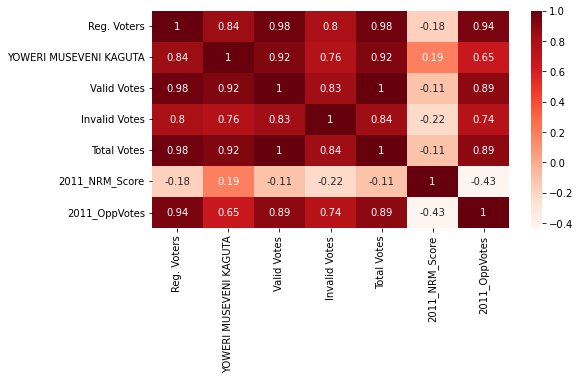

In [285]:
plt.figure(figsize = (8,4))
sns.heatmap(pre_11.corr(), cmap=plt.cm.Reds, annot=True)

In [286]:
pre_11.columns

Index(['District', 'Reg. Voters', 'YOWERI MUSEVENI KAGUTA', 'Valid Votes',
       'Invalid Votes', 'Total Votes', '2011_NRM_Score', '2011_OppVotes'],
      dtype='object')

In [287]:
# drop
pre_11 = pre_11.drop(['Reg. Voters', 'Valid Votes', 'Total Votes'], axis=1)

In [288]:
pre_11.corr()

,YOWERI MUSEVENI KAGUTA,Invalid Votes,2011_NRM_Score,2011_OppVotes
YOWERI MUSEVENI KAGUTA,1.000000,0.758907,0.187430,0.649227
Invalid Votes,0.758907,1.000000,-0.221577,0.743243
2011_NRM_Score,0.187430,-0.221577,1.000000,-0.432466
2011_OppVotes,0.649227,0.743243,-0.432466,1.000000


In [289]:
pre_11['District'].isin(pre_1_6['District']).value_counts()

True     69
False    43
Name: District, dtype: int64

In [290]:
len(set(pre_11['District']).difference(set(pre_1_6['District'])))

43

In [291]:
pre_11.columns

Index(['District', 'YOWERI MUSEVENI KAGUTA', 'Invalid Votes', '2011_NRM_Score',
       '2011_OppVotes'],
      dtype='object')

In [292]:
pre_11.columns = ['District','2011_NRMVotes', '2011_IV', '2011_NRM_Score', '2011_OV']

In [293]:
pre_1_6_11 = pre_11.merge(pre_1_6,how='left', left_on='District', right_on='District')

In [294]:
pre_1_6_11

,District,2011_NRMVotes,2011_IV,2011_NRM_Score,2011_OV,2006_NRMVotes,2006_IV,2006_NRM_Score,2006_OV,2001_NRMVotes,2001_IV,2001_OV,2001_NRM_Score
0,ABIM,16098,552,0.909132,1609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADJUMANI,20918,2526,0.648721,11327,11277.0,1990.0,0.343937,21511.0,14944.0,1204.0,9830.0,0.603213
2,AGAGO,26632,3553,0.595661,18078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALEBTONG,24171,2641,0.485742,25590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AMOLATAR,19350,1171,0.559685,15223,7112.0,715.0,0.287029,17666.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,SSEMBABULE,56053,1669,0.813565,12845,47213.0,1477.0,0.775751,13648.0,58659.0,1080.0,10118.0,0.852887
108,TORORO,75820,5494,0.592858,52069,47549.0,9856.0,0.432941,62279.0,89403.0,7003.0,70999.0,0.557368
109,WAKISO,170890,9306,0.492644,175993,129524.0,7646.0,0.476470,142317.0,153719.0,4656.0,145117.0,0.514393
110,YUMBE,31811,2562,0.589453,22156,19832.0,1918.0,0.426247,26695.0,11541.0,2027.0,22557.0,0.338466


In [295]:
pre_1_6_11.to_csv('pre_1_6_11.csv', index=False)

### 2016 PRESIDENTS

In [296]:
pre_16 = pd.read_csv('presidents/pres_2016.csv')

In [ ]:
pre_16

In [297]:
pre_16['2016_NRM_Score'] = pre_16['YOWERI  KAGUTA MUSEVENI']/pre_16['Valid Votes']
pre_16['2016_Opp_Votes'] = pre_16['Valid Votes'] - pre_16['YOWERI  KAGUTA MUSEVENI']

In [298]:
pre_16.columns

Index(['District', 'Reg. Voters', 'ABED  BWANIKA', 'AMAMA  MBABAZI',
       'BARYAMUREEBA VENANSIUS', 'BENON  BUTA BIRAARO',
       'KIZZA  BESIGYE KIFEFE', 'MABIRIZI  JOSEPH',
       'MAUREEN  FAITH KYALYA WALUUBE', 'YOWERI  KAGUTA MUSEVENI',
       'Valid Votes', 'Invalid Votes', 'Total Votes', '2016_NRM_Score',
       '2016_Opp_Votes'],
      dtype='object')

In [299]:
pre_16 = pre_16.drop(['ABED  BWANIKA', 'AMAMA  MBABAZI',
       'BARYAMUREEBA VENANSIUS', 'BENON  BUTA BIRAARO',
       'KIZZA  BESIGYE KIFEFE', 'MABIRIZI  JOSEPH',
       'MAUREEN  FAITH KYALYA WALUUBE'], axis=1)

<AxesSubplot:>

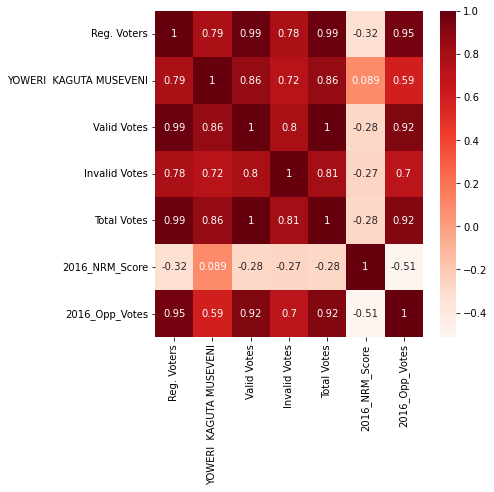

In [300]:
sort

In [301]:
pre_16.columns

Index(['District', 'Reg. Voters', 'YOWERI  KAGUTA MUSEVENI', 'Valid Votes',
       'Invalid Votes', 'Total Votes', '2016_NRM_Score', '2016_Opp_Votes'],
      dtype='object')

In [302]:
pre_16 = pre_16.drop(['Reg. Voters','Valid Votes','Total Votes'], axis=1)

In [303]:
pre_16.corr()

,YOWERI KAGUTA MUSEVENI,Invalid Votes,2016_NRM_Score,2016_Opp_Votes
YOWERI KAGUTA MUSEVENI,1.000000,0.721708,0.088977,0.587133
Invalid Votes,0.721708,1.000000,-0.267372,0.701715
2016_NRM_Score,0.088977,-0.267372,1.000000,-0.512714
2016_Opp_Votes,0.587133,0.701715,-0.512714,1.000000


In [304]:
pre_16.columns = ['District', '2016_NRMVOTES', '2016_IV', '2016_NRM_Score', '2016_Opp_Votes']

In [305]:
pre_16

,District,2016_NRMVOTES,2016_IV,2016_NRM_Score,2016_Opp_Votes
0,001 APAC,56371,5023,0.562624,43822
1,002 ARUA,114868,20736,0.577084,84181
2,003 BUNDIBUGYO,61553,4054,0.855925,10361
3,004 BUSHENYI,61837,2797,0.687284,28136
4,005 GULU,31391,5694,0.327351,64503
...,...,...,...,...,...
107,108 NGORA,19444,2635,0.452039,23570
108,109 BUHWEJU,38229,2467,0.850857,6701
109,110 NWOYA,9922,1359,0.416383,13907
110,111 AGAGO,35501,3016,0.599092,23757


In [306]:
pre_16['District'] = [i.split(maxsplit=1)[1] for i in pre_16['District']]

In [307]:
pre_16 = pre_16.sort_values(by=['District'])

In [308]:
pre_16['District'].isin(pre_1_6_11['District']).value_counts()

True    112
Name: District, dtype: int64

In [673]:
df = pre_1_6_11.copy()
df.columns

Index(['District', '2011_NRMVotes', '2011_IV', '2011_NRM_Score', '2011_OV',
       '2006_NRMVotes', '2006_IV', '2006_NRM_Score', '2006_OV',
       '2001_NRMVotes', '2001_IV', '2001_OV', '2001_NRM_Score'],
      dtype='object')

<AxesSubplot:>

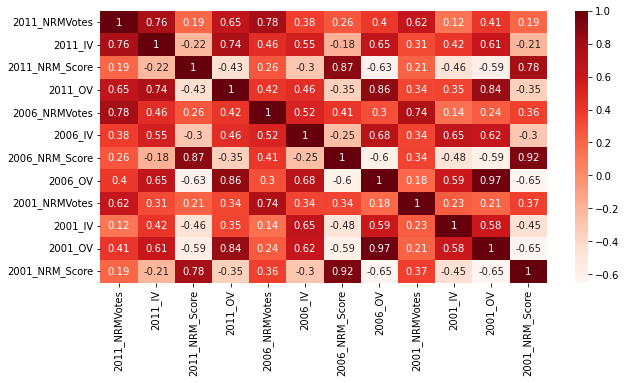

In [674]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)

In [675]:
df = df.reindex(sorted(df.columns), axis=1)

In [676]:
df.columns

Index(['2001_IV', '2001_NRMVotes', '2001_NRM_Score', '2001_OV', '2006_IV',
       '2006_NRMVotes', '2006_NRM_Score', '2006_OV', '2011_IV',
       '2011_NRMVotes', '2011_NRM_Score', '2011_OV', 'District'],
      dtype='object')

In [677]:
df = df.drop(['2006_OV','2006_NRM_Score', '2011_OV', '2001_NRM_Score'], axis=1)

In [678]:
df = df.drop('District', axis=1)

<AxesSubplot:>

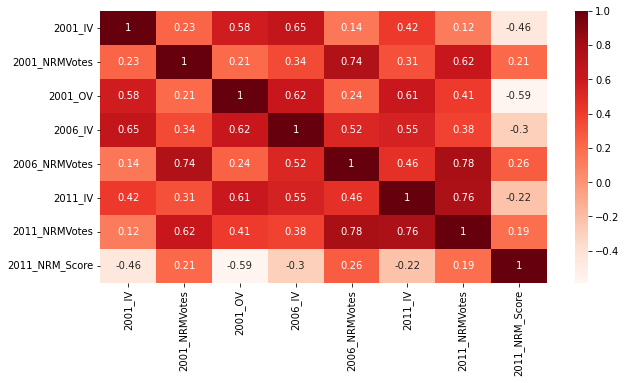

In [679]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)

In [670]:
df.columns

Index(['2001_IV', '2001_NRMVotes', '2001_OV', '2006_IV', '2006_NRMVotes',
       '2011_IV', '2011_NRMVotes', '2011_NRM_Score', 'District'],
      dtype='object')

In [377]:
dfn = df.fillna(0)

In [680]:
dfm = df.copy()
# dfm = dfm.to_numpy()

In [709]:
dfm

,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2011_NRM_Score
0,NaN,NaN,NaN,NaN,NaN,552,16098,0.909132
1,1204.0,14944.0,9830.0,1990.0,11277.0,2526,20918,0.648721
2,NaN,NaN,NaN,NaN,NaN,3553,26632,0.595661
3,NaN,NaN,NaN,NaN,NaN,2641,24171,0.485742
4,NaN,NaN,NaN,715.0,7112.0,1171,19350,0.559685
...,...,...,...,...,...,...,...,...
107,1080.0,58659.0,10118.0,1477.0,47213.0,1669,56053,0.813565
108,7003.0,89403.0,70999.0,9856.0,47549.0,5494,75820,0.592858
109,4656.0,153719.0,145117.0,7646.0,129524.0,9306,170890,0.492644
110,2027.0,11541.0,22557.0,1918.0,19832.0,2562,31811,0.589453


In [697]:
y = pre_16['2016_NRM_Score']
y = np.array([round(i, 3) for i in pre_16['2016_NRM_Score']])
# dfn = np.array(dfn)
y.shape, dfm.shape

((112,), (112, 8))

In [698]:
dfm_scaled = StandardScaler().fit_transform(dfm)

In [699]:
xtrain, xtest, ytrain, ytest = train_test_split(dfm_scaled, y, test_size=.2, random_state=0)

In [700]:
y

array([0.8  , 0.661, 0.599, 0.488, 0.554, 0.973, 0.559, 0.315, 0.563,
       0.577, 0.606, 0.608, 0.613, 0.851, 0.551, 0.586, 0.532, 0.814,
       0.679, 0.687, 0.856, 0.687, 0.553, 0.565, 0.528, 0.574, 0.831,
       0.51 , 0.742, 0.327, 0.745, 0.819, 0.599, 0.74 , 0.504, 0.9  ,
       0.655, 0.761, 0.554, 0.536, 0.819, 0.545, 0.309, 0.685, 0.861,
       0.579, 0.67 , 0.414, 0.635, 0.561, 0.814, 0.749, 0.687, 0.913,
       0.75 , 0.886, 0.418, 0.659, 0.55 , 0.913, 0.532, 0.712, 0.792,
       0.863, 0.855, 0.429, 0.395, 0.709, 0.558, 0.621, 0.793, 0.624,
       0.605, 0.457, 0.696, 0.62 , 0.473, 0.708, 0.672, 0.623, 0.893,
       0.588, 0.55 , 0.774, 0.493, 0.95 , 0.762, 0.845, 0.586, 0.701,
       0.937, 0.659, 0.452, 0.778, 0.68 , 0.416, 0.643, 0.507, 0.389,
       0.54 , 0.62 , 0.76 , 0.483, 0.514, 0.701, 0.49 , 0.38 , 0.703,
       0.416, 0.368, 0.684, 0.75 ])

In [701]:
gbr = XGBRegressor()
hgr = HistGradientBoostingRegressor()
cbr  = CatBoostRegressor()
lbr = LGBMRegressor()
xtr = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()

In [702]:
hgr.fit(xtrain, ytrain);

In [703]:
gbr.fit(xtrain, ytrain);

In [660]:
cbr.fit(xtrain, ytrain);

Learning rate set to 0.027937
0:	learn: 0.1505577	total: 1.48ms	remaining: 1.48s
1:	learn: 0.1489425	total: 3.1ms	remaining: 1.54s
2:	learn: 0.1472620	total: 4.33ms	remaining: 1.44s
3:	learn: 0.1456556	total: 5.64ms	remaining: 1.4s
4:	learn: 0.1438468	total: 8.43ms	remaining: 1.68s
5:	learn: 0.1418980	total: 10.2ms	remaining: 1.68s
6:	learn: 0.1403558	total: 12.7ms	remaining: 1.8s
7:	learn: 0.1389958	total: 14.9ms	remaining: 1.84s
8:	learn: 0.1375102	total: 16.2ms	remaining: 1.78s
9:	learn: 0.1360556	total: 17.4ms	remaining: 1.72s
10:	learn: 0.1345400	total: 18.6ms	remaining: 1.67s
11:	learn: 0.1327994	total: 19.9ms	remaining: 1.64s
12:	learn: 0.1313656	total: 21.3ms	remaining: 1.62s
13:	learn: 0.1295517	total: 22.3ms	remaining: 1.57s
14:	learn: 0.1280522	total: 23.9ms	remaining: 1.57s
15:	learn: 0.1265153	total: 25.7ms	remaining: 1.58s
16:	learn: 0.1254448	total: 26.9ms	remaining: 1.55s
17:	learn: 0.1239467	total: 28ms	remaining: 1.53s
18:	learn: 0.1227043	total: 29.8ms	remaining: 1.5

159:	learn: 0.0491606	total: 299ms	remaining: 1.57s
160:	learn: 0.0489429	total: 300ms	remaining: 1.56s
161:	learn: 0.0487228	total: 301ms	remaining: 1.56s
162:	learn: 0.0484748	total: 303ms	remaining: 1.55s
163:	learn: 0.0482353	total: 304ms	remaining: 1.55s
164:	learn: 0.0480787	total: 305ms	remaining: 1.54s
165:	learn: 0.0479300	total: 307ms	remaining: 1.54s
166:	learn: 0.0476977	total: 308ms	remaining: 1.54s
167:	learn: 0.0474941	total: 310ms	remaining: 1.53s
168:	learn: 0.0473413	total: 311ms	remaining: 1.53s
169:	learn: 0.0472048	total: 312ms	remaining: 1.52s
170:	learn: 0.0470533	total: 314ms	remaining: 1.52s
171:	learn: 0.0468541	total: 315ms	remaining: 1.51s
172:	learn: 0.0466469	total: 317ms	remaining: 1.51s
173:	learn: 0.0465149	total: 318ms	remaining: 1.51s
174:	learn: 0.0463851	total: 319ms	remaining: 1.5s
175:	learn: 0.0462585	total: 320ms	remaining: 1.5s
176:	learn: 0.0460397	total: 322ms	remaining: 1.5s
177:	learn: 0.0459632	total: 323ms	remaining: 1.49s
178:	learn: 0.0

383:	learn: 0.0260522	total: 578ms	remaining: 927ms
384:	learn: 0.0260368	total: 580ms	remaining: 926ms
385:	learn: 0.0259009	total: 581ms	remaining: 924ms
386:	learn: 0.0258875	total: 583ms	remaining: 923ms
387:	learn: 0.0257990	total: 584ms	remaining: 921ms
388:	learn: 0.0257859	total: 586ms	remaining: 920ms
389:	learn: 0.0256485	total: 587ms	remaining: 918ms
390:	learn: 0.0255255	total: 588ms	remaining: 916ms
391:	learn: 0.0255107	total: 590ms	remaining: 915ms
392:	learn: 0.0254961	total: 591ms	remaining: 913ms
393:	learn: 0.0254834	total: 593ms	remaining: 912ms
394:	learn: 0.0253623	total: 594ms	remaining: 910ms
395:	learn: 0.0253480	total: 596ms	remaining: 909ms
396:	learn: 0.0252655	total: 597ms	remaining: 907ms
397:	learn: 0.0252531	total: 599ms	remaining: 906ms
398:	learn: 0.0251246	total: 600ms	remaining: 904ms
399:	learn: 0.0251124	total: 602ms	remaining: 903ms
400:	learn: 0.0249943	total: 603ms	remaining: 901ms
401:	learn: 0.0249806	total: 605ms	remaining: 899ms
402:	learn: 

545:	learn: 0.0178508	total: 769ms	remaining: 639ms
546:	learn: 0.0178337	total: 770ms	remaining: 637ms
547:	learn: 0.0178014	total: 771ms	remaining: 636ms
548:	learn: 0.0177955	total: 772ms	remaining: 634ms
549:	learn: 0.0176869	total: 774ms	remaining: 633ms
550:	learn: 0.0176554	total: 775ms	remaining: 631ms
551:	learn: 0.0176158	total: 776ms	remaining: 630ms
552:	learn: 0.0175848	total: 777ms	remaining: 628ms
553:	learn: 0.0174646	total: 779ms	remaining: 627ms
554:	learn: 0.0174433	total: 780ms	remaining: 625ms
555:	learn: 0.0174227	total: 780ms	remaining: 623ms
556:	learn: 0.0173920	total: 782ms	remaining: 622ms
557:	learn: 0.0173419	total: 783ms	remaining: 620ms
558:	learn: 0.0173121	total: 784ms	remaining: 619ms
559:	learn: 0.0172956	total: 785ms	remaining: 617ms
560:	learn: 0.0172887	total: 786ms	remaining: 615ms
561:	learn: 0.0172400	total: 787ms	remaining: 614ms
562:	learn: 0.0171248	total: 788ms	remaining: 612ms
563:	learn: 0.0170887	total: 790ms	remaining: 611ms
564:	learn: 

742:	learn: 0.0119538	total: 1.04s	remaining: 360ms
743:	learn: 0.0119426	total: 1.04s	remaining: 359ms
744:	learn: 0.0118863	total: 1.04s	remaining: 357ms
745:	learn: 0.0118752	total: 1.04s	remaining: 356ms
746:	learn: 0.0118531	total: 1.05s	remaining: 354ms
747:	learn: 0.0118422	total: 1.05s	remaining: 353ms
748:	learn: 0.0117867	total: 1.05s	remaining: 351ms
749:	learn: 0.0117681	total: 1.05s	remaining: 350ms
750:	learn: 0.0117573	total: 1.05s	remaining: 348ms
751:	learn: 0.0117486	total: 1.05s	remaining: 347ms
752:	learn: 0.0116939	total: 1.05s	remaining: 345ms
753:	learn: 0.0116833	total: 1.05s	remaining: 344ms
754:	learn: 0.0116728	total: 1.05s	remaining: 343ms
755:	learn: 0.0116190	total: 1.06s	remaining: 341ms
756:	learn: 0.0116107	total: 1.06s	remaining: 339ms
757:	learn: 0.0116004	total: 1.06s	remaining: 338ms
758:	learn: 0.0115407	total: 1.06s	remaining: 337ms
759:	learn: 0.0115306	total: 1.06s	remaining: 335ms
760:	learn: 0.0115179	total: 1.06s	remaining: 334ms
761:	learn: 

903:	learn: 0.0085426	total: 1.24s	remaining: 132ms
904:	learn: 0.0085266	total: 1.24s	remaining: 130ms
905:	learn: 0.0084766	total: 1.24s	remaining: 129ms
906:	learn: 0.0084688	total: 1.25s	remaining: 128ms
907:	learn: 0.0084629	total: 1.25s	remaining: 126ms
908:	learn: 0.0084275	total: 1.25s	remaining: 125ms
909:	learn: 0.0084038	total: 1.25s	remaining: 123ms
910:	learn: 0.0083922	total: 1.25s	remaining: 122ms
911:	learn: 0.0083863	total: 1.25s	remaining: 121ms
912:	learn: 0.0083379	total: 1.25s	remaining: 119ms
913:	learn: 0.0083321	total: 1.25s	remaining: 118ms
914:	learn: 0.0083090	total: 1.25s	remaining: 117ms
915:	learn: 0.0082976	total: 1.26s	remaining: 115ms
916:	learn: 0.0082919	total: 1.26s	remaining: 114ms
917:	learn: 0.0082637	total: 1.26s	remaining: 112ms
918:	learn: 0.0082466	total: 1.26s	remaining: 111ms
919:	learn: 0.0082310	total: 1.26s	remaining: 110ms
920:	learn: 0.0082024	total: 1.26s	remaining: 108ms
921:	learn: 0.0081733	total: 1.26s	remaining: 107ms
922:	learn: 

In [661]:
# xtr.fit(xtrain, ytrain)

In [704]:
lbr.fit(xtrain, ytrain)

LGBMRegressor()

In [705]:
print(gbr.score(xtrain, ytrain))
print(gbr.score(xtest, ytest))

0.9999543150651896
0.8820535951157917


In [706]:
gbr.predict(xtest)

array([0.80389816, 0.59774595, 0.6251992 , 0.35737222, 0.5944132 ,
       0.421888  , 0.5377673 , 0.55780745, 0.8945223 , 0.8122797 ,
       0.5584714 , 0.58750206, 0.5951517 , 0.60344297, 0.5909644 ,
       0.42968333, 0.5502971 , 0.8656945 , 0.41057646, 0.65533483,
       0.53962684, 0.749711  , 0.71204275], dtype=float32)

In [707]:
ytest

array([0.831, 0.635, 0.606, 0.395, 0.643, 0.315, 0.659, 0.599, 0.937,
       0.74 , 0.553, 0.672, 0.62 , 0.62 , 0.55 , 0.452, 0.532, 0.851,
       0.38 , 0.579, 0.528, 0.778, 0.701])

In [708]:
mean_squared_error(ytest,gbr.predict(xtest))

0.002596652755585907

In [664]:
print(hgr.score(xtrain, ytrain))
print(hgr.score(xtest, ytest))
# hgr.score(xtest, ytest)

0.8502523138982037
0.6781037929871365


In [665]:
print(cbr.score(xtrain, ytrain))
print(cbr.score(xtest, ytest))
# cbr.score(xtest, ytest)

0.9980458133560564
0.8431585794809093


In [666]:
lbr.score(xtest, ytest)

0.7008414933342272

In [711]:
dfm['District'] = pre_1_6_11['District']

In [712]:
pre_1_6_11_16 = pre_16.merge(dfm,how='left', left_on='District', right_on='District')

In [713]:
pre_1_6_11_16 = pre_1_6_11_16.reindex(sorted(pre_1_6_11_16.columns), axis=1)

In [714]:
pre_1_6_11_16.to_csv('pre_1_6_11_16.csv')

In [715]:
df2 = pre_1_6_11_16.copy()

<AxesSubplot:>

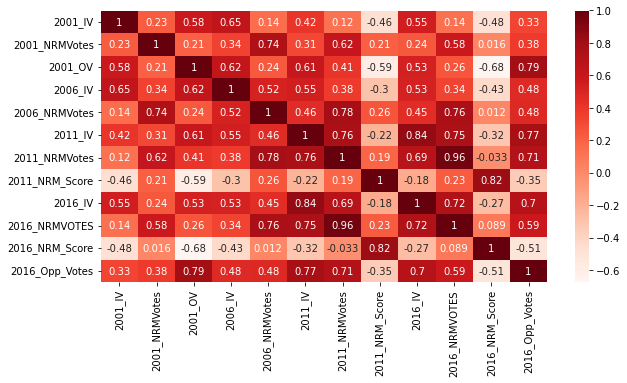

In [716]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True, cmap=plt.cm.Reds)

### 2021 PRESIDENTS

In [481]:
pre_21 = pd.read_csv('presidents/pres_2021.csv')

In [ ]:
pre_21

In [482]:
pre_21['District'] = [i.split(maxsplit=1)[1] for i in pre_21['District']]

In [ ]:
pre_21

In [483]:
pre_21['2021_NRM_Score'] = pre_21['YOWERI MUSEVENI TIBUHABUR WA KAGUTA']/pre_21['Valid Votes']
pre_21['2021_Opp_Votes'] = pre_21['Valid Votes'] - pre_21['YOWERI MUSEVENI TIBUHABUR WA KAGUTA']

In [ ]:
pre_21

In [484]:
pre_21.columns

Index(['District', 'Reg. Voters', 'AMURIAT OBOI PATRICK',
       'KABULETA KIIZA JOSEPH', 'KALEMBE NANCY LINDA', 'KATUMBA JOHN',
       'KYAGULANYI SSENTAMU ROBERT', 'MAO NORBERT', 'MAYAMBALA WILLY',
       'MUGISHA MUNTU GREGG', 'MWESIGYE FRED', 'TUMUKUNDE HENRY KAKURUGU',
       'YOWERI MUSEVENI TIBUHABUR WA KAGUTA', 'Valid Votes', 'Invalid Votes',
       'Total Votes', '2021_NRM_Score', '2021_Opp_Votes'],
      dtype='object')

In [485]:
pre_21 = pre_21.drop(['AMURIAT OBOI PATRICK',
       'KABULETA KIIZA JOSEPH', 'KALEMBE NANCY LINDA', 'KATUMBA JOHN',
       'KYAGULANYI SSENTAMU ROBERT', 'MAO NORBERT', 'MAYAMBALA WILLY',
        'MUGISHA MUNTU GREGG', 'MWESIGYE FRED', 'TUMUKUNDE HENRY KAKURUGU'], axis=1)

In [ ]:
pre_21

<AxesSubplot:>

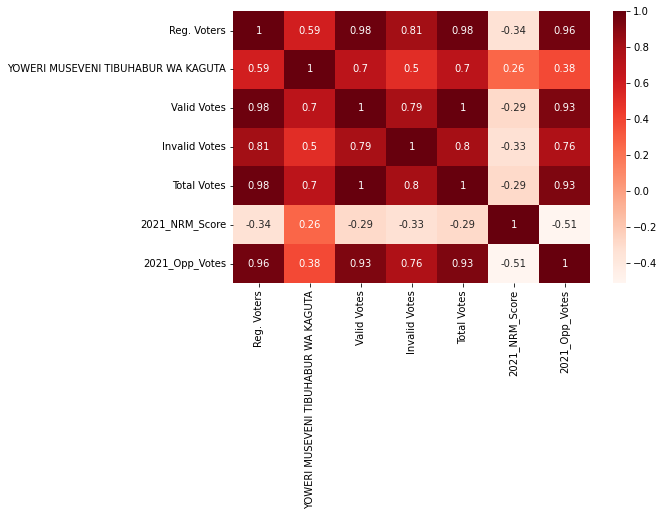

In [486]:
plt.figure(figsize=(8,5))
sns.heatmap(pre_21.corr(), annot=True, cmap=plt.cm.Reds)

In [487]:
pre_21.columns

Index(['District', 'Reg. Voters', 'YOWERI MUSEVENI TIBUHABUR WA KAGUTA',
       'Valid Votes', 'Invalid Votes', 'Total Votes', '2021_NRM_Score',
       '2021_Opp_Votes'],
      dtype='object')

In [488]:
pre_21 = pre_21.drop(['Reg. Voters','Valid Votes','Total Votes'], axis=1)

In [489]:
pre_21.corr()

,YOWERI MUSEVENI TIBUHABUR WA KAGUTA,Invalid Votes,2021_NRM_Score,2021_Opp_Votes
YOWERI MUSEVENI TIBUHABUR WA KAGUTA,1.000000,0.504396,0.259412,0.378402
Invalid Votes,0.504396,1.000000,-0.330672,0.763599
2021_NRM_Score,0.259412,-0.330672,1.000000,-0.512622
2021_Opp_Votes,0.378402,0.763599,-0.512622,1.000000


In [490]:
pre_21

,District,YOWERI MUSEVENI TIBUHABUR WA KAGUTA,Invalid Votes,2021_NRM_Score,2021_Opp_Votes
0,APAC,31908,3161,0.610656,20344
1,ARUA,23824,2263,0.704769,9980
2,BUNDIBUGYO,52408,2145,0.730191,19365
3,BUSHENYI,66572,2674,0.785594,18169
4,GULU,9997,2055,0.503906,9842
...,...,...,...,...,...
141,MBALE CITY,29717,3128,0.394287,45652
142,TEREGO,24718,4497,0.511125,23642
143,LIRA CITY,30271,2140,0.579749,21943
144,HOIMA CITY,19751,1450,0.570690,14858


In [491]:
pre_21.columns = ['District','2021_NRM_Votes', '2021_IV', '2021_NRM_Score', '2021_Opp_Votes']

In [ ]:
pre_21

In [717]:
pre_21['District'].isin(df2['District']).value_counts()

True     111
False     35
Name: District, dtype: int64

In [718]:
pre_1_6_11_16_21 = pre_21.merge(df2,how='left', left_on='District', right_on='District')

In [719]:
pre_1_6_11_16_21 = pre_1_6_11_16_21.reindex(sorted(pre_1_6_11_16_21.columns), axis=1)

In [814]:
df3 = pre_1_6_11_16_21.copy()
pre_1_6_11_16_21.to_csv('pre_1_6_11_16_21.csv', index=False)

In [815]:
df3= df3.sort_values(by=['District'])

In [752]:
df3 = df3.fillna(0)

In [816]:
df3

,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2011_NRM_Score,2016_IV,2016_NRMVOTES,2016_NRM_Score,2016_Opp_Votes,2021_IV,2021_NRM_Score,2021_NRM_Votes,2021_Opp_Votes,District
69,NaN,NaN,NaN,NaN,NaN,552.0,16098.0,0.909132,1134.0,17109.0,0.800459,4265.0,875,0.773868,18254,5334,ABIM
39,1204.0,14944.0,9830.0,1990.0,11277.0,2526.0,20918.0,0.648721,4337.0,26346.0,0.660997,13512.0,2540,0.756662,35125,11296,ADJUMANI
110,NaN,NaN,NaN,NaN,NaN,3553.0,26632.0,0.595661,3016.0,35501.0,0.599092,23757.0,2572,0.745704,47696,16265,AGAGO
87,NaN,NaN,NaN,NaN,NaN,2641.0,24171.0,0.485742,3426.0,31592.0,0.488209,33118.0,3207,0.652728,42832,22788,ALEBTONG
56,NaN,NaN,NaN,715.0,7112.0,1171.0,19350.0,0.559685,2020.0,24789.0,0.553857,19968.0,1908,0.753159,38619,12657,AMOLATAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4497,0.511125,24718,23642,TEREGO
38,7003.0,89403.0,70999.0,9856.0,47549.0,5494.0,75820.0,0.592858,9557.0,64882.0,0.415721,91189.0,5792,0.558229,86248,68255,TORORO
51,4656.0,153719.0,145117.0,7646.0,129524.0,9306.0,170890.0,0.492644,16338.0,172129.0,0.367600,296122.0,12518,0.218175,122505,438995,WAKISO
52,2027.0,11541.0,22557.0,1918.0,19832.0,2562.0,31811.0,0.589453,3924.0,44837.0,0.683814,20732.0,4075,0.712382,50686,20464,YUMBE


<AxesSubplot:>

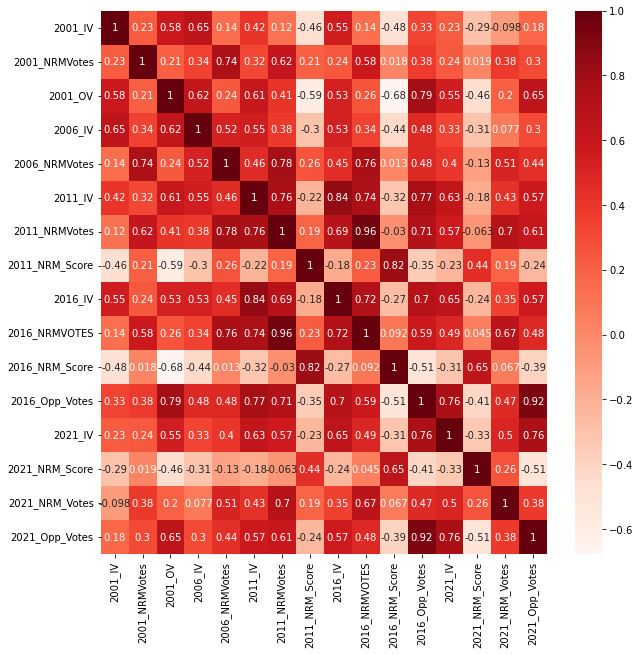

In [817]:
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(), annot=True, cmap=plt.cm.Reds)

In [755]:
df3.columns

Index(['2001_IV', '2001_NRMVotes', '2001_OV', '2006_IV', '2006_NRMVotes',
       '2011_IV', '2011_NRMVotes', '2011_NRM_Score', '2016_IV',
       '2016_NRMVOTES', '2016_NRM_Score', '2016_Opp_Votes', '2021_IV',
       '2021_NRM_Score', '2021_NRM_Votes', '2021_Opp_Votes', 'District'],
      dtype='object')

In [818]:
df3 = df3.drop(['2011_NRMVotes','2021_IV','2021_NRM_Votes', '2021_Opp_Votes', 'District'], axis=1)

<AxesSubplot:>

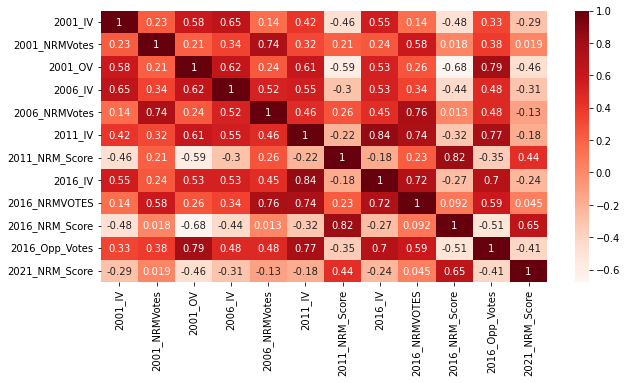

In [819]:
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(), annot=True, cmap=plt.cm.Reds)

In [798]:
df3.columns

Index(['2001_IV', '2001_NRMVotes', '2001_OV', '2006_IV', '2006_NRMVotes',
       '2011_IV', '2011_NRM_Score', '2016_IV', '2016_NRMVOTES',
       '2016_NRM_Score', '2016_Opp_Votes', '2021_NRM_Score'],
      dtype='object')

In [799]:
df3 = df3.drop(['2016_NRM_Score', '2011_IV',  '2001_OV','2006_IV'], axis=1)

<AxesSubplot:>

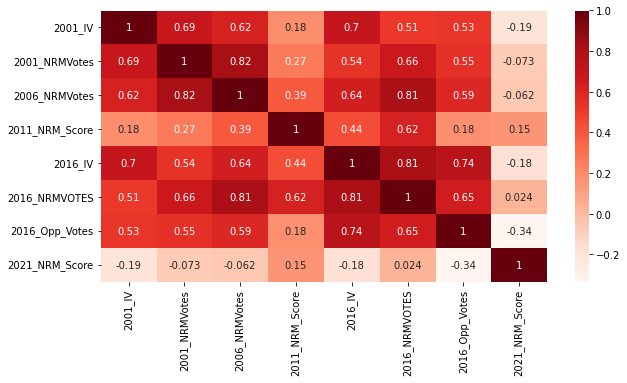

In [800]:
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(), annot=True, cmap=plt.cm.Reds)

In [820]:
X3 = df3.drop('2021_NRM_Score', axis=1)
y3 = df3['2021_NRM_Score']

In [821]:
for each in X3.columns:
    X3[each] = [int(i) for i in X3[each]]

ValueError: cannot convert float NaN to integer

In [823]:
X3

,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRM_Score,2016_IV,2016_NRMVOTES,2016_NRM_Score,2016_Opp_Votes
69,NaN,NaN,NaN,NaN,NaN,552.0,0.909132,1134.0,17109.0,0.800459,4265.0
39,1204.0,14944.0,9830.0,1990.0,11277.0,2526.0,0.648721,4337.0,26346.0,0.660997,13512.0
110,NaN,NaN,NaN,NaN,NaN,3553.0,0.595661,3016.0,35501.0,0.599092,23757.0
87,NaN,NaN,NaN,NaN,NaN,2641.0,0.485742,3426.0,31592.0,0.488209,33118.0
56,NaN,NaN,NaN,715.0,7112.0,1171.0,0.559685,2020.0,24789.0,0.553857,19968.0
...,...,...,...,...,...,...,...,...,...,...,...
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,7003.0,89403.0,70999.0,9856.0,47549.0,5494.0,0.592858,9557.0,64882.0,0.415721,91189.0
51,4656.0,153719.0,145117.0,7646.0,129524.0,9306.0,0.492644,16338.0,172129.0,0.367600,296122.0
52,2027.0,11541.0,22557.0,1918.0,19832.0,2562.0,0.589453,3924.0,44837.0,0.683814,20732.0


In [824]:
X3_Scaled = StandardScaler().fit_transform(X3)
# X3_PCA = PCA().fit_transform(X3_Scaled)

In [825]:
xtn, xts, ytn, yts = train_test_split(X3_Scaled, y3, test_size=0.3, random_state=0)

In [826]:
xtn.shape, xts.shape

((102, 11), (44, 11))

In [827]:
gbr = XGBRegressor()
hgr = HistGradientBoostingRegressor()
cbr  = CatBoostRegressor()
lbr = LGBMRegressor()
xtr = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()

In [828]:
gbr.fit(xtn, ytn);

In [829]:
hgr.fit(xtn, ytn);

In [830]:
hgr.score(xts, yts)

0.3937408810044636

In [831]:
hgr.score(xtn, ytn)

0.5481091911723809

In [832]:
gbr.score(xtn, ytn)

0.6756407399699559

In [833]:
gbr.score(xts, yts)

0.35202140981748153

In [46]:
pre_1_6_11_16_21 = pd.read_csv('pre_1_6_11_16_21.csv')

In [47]:
pre_1_6_11_16_21.isna().sum()

2001_IV           94
2001_NRMVotes     94
2001_OV           94
2006_IV           78
2006_NRMVotes     78
2011_IV           35
2011_NRMVotes     35
2011_NRM_Score    35
2016_IV           35
2016_NRMVOTES     35
2016_NRM_Score    35
2016_Opp_Votes    35
2021_IV            0
2021_NRM_Score     0
2021_NRM_Votes     0
2021_Opp_Votes     0
District           0
dtype: int64

In [ ]:
# pre_1_6_11_16_21 =  pre_1_6_11_16_21.fillna(0)

In [48]:
pre_1_6_11_16_21

,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2011_NRM_Score,2016_IV,2016_NRMVOTES,2016_NRM_Score,2016_Opp_Votes,2021_IV,2021_NRM_Score,2021_NRM_Votes,2021_Opp_Votes,District
0,5604.0,37133.0,133372.0,10391.0,25865.0,3087.0,41712.0,0.581976,5023.0,56371.0,0.562624,43822.0,3161,0.610656,31908,20344,APAC
1,9807.0,72393.0,112419.0,11022.0,68560.0,9207.0,85005.0,0.550618,20736.0,114868.0,0.577084,84181.0,2263,0.704769,23824,9980,ARUA
2,1112.0,39676.0,3451.0,3019.0,45651.0,2401.0,45909.0,0.869439,4054.0,61553.0,0.855925,10361.0,2145,0.730191,52408,19365,BUNDIBUGYO
3,3427.0,212540.0,46387.0,8055.0,176909.0,1907.0,51894.0,0.757068,2797.0,61837.0,0.687284,28136.0,2674,0.785594,66572,18169,BUSHENYI
4,6076.0,15320.0,117410.0,5631.0,16866.0,5340.0,24590.0,0.290353,5694.0,31391.0,0.327351,64503.0,2055,0.503906,9997,9842,GULU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3128,0.394287,29717,45652,MBALE CITY
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4497,0.511125,24718,23642,TEREGO
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2140,0.579749,30271,21943,LIRA CITY
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1450,0.570690,19751,14858,HOIMA CITY


In [ ]:
pre_1_6_11_16_21.to_csv('final_df.csv', index=False)

<AxesSubplot:>

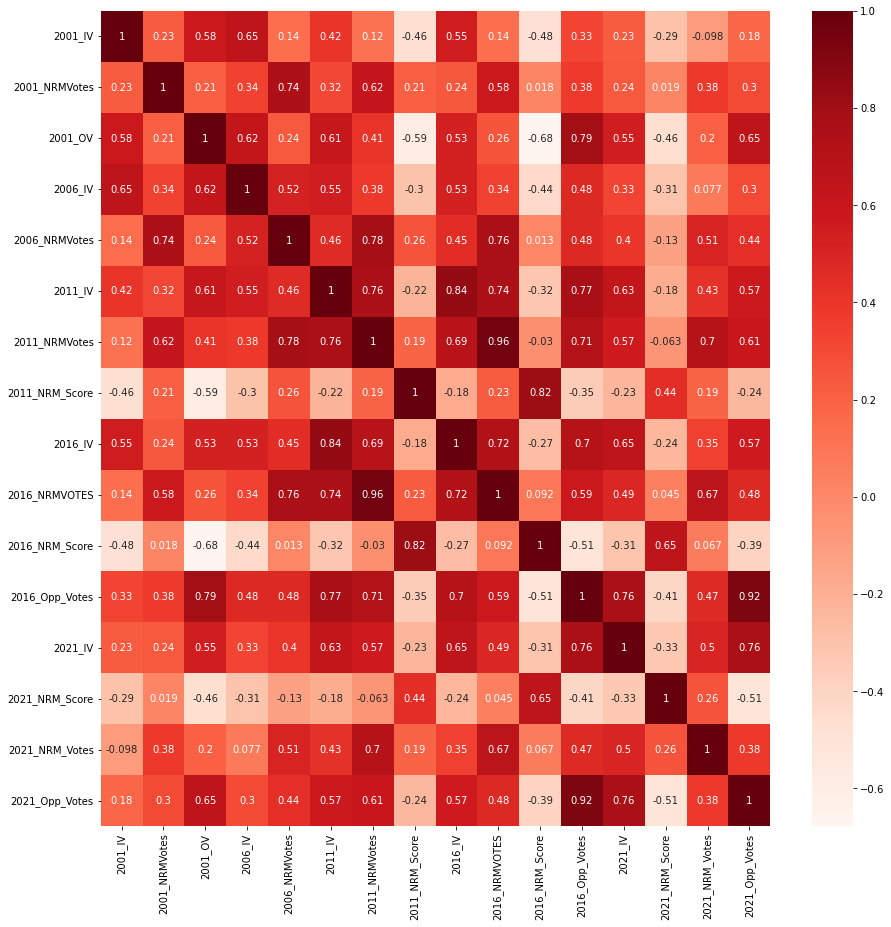

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(pre_1_6_11_16_21.corr(), annot=True, cmap=plt.cm.Reds)

In [50]:
final_df = pd.read_csv('pre_1_6_11_16_21.csv')

In [51]:
final_df

,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2011_NRM_Score,2016_IV,2016_NRMVOTES,2016_NRM_Score,2016_Opp_Votes,2021_IV,2021_NRM_Score,2021_NRM_Votes,2021_Opp_Votes,District
0,5604.0,37133.0,133372.0,10391.0,25865.0,3087.0,41712.0,0.581976,5023.0,56371.0,0.562624,43822.0,3161,0.610656,31908,20344,APAC
1,9807.0,72393.0,112419.0,11022.0,68560.0,9207.0,85005.0,0.550618,20736.0,114868.0,0.577084,84181.0,2263,0.704769,23824,9980,ARUA
2,1112.0,39676.0,3451.0,3019.0,45651.0,2401.0,45909.0,0.869439,4054.0,61553.0,0.855925,10361.0,2145,0.730191,52408,19365,BUNDIBUGYO
3,3427.0,212540.0,46387.0,8055.0,176909.0,1907.0,51894.0,0.757068,2797.0,61837.0,0.687284,28136.0,2674,0.785594,66572,18169,BUSHENYI
4,6076.0,15320.0,117410.0,5631.0,16866.0,5340.0,24590.0,0.290353,5694.0,31391.0,0.327351,64503.0,2055,0.503906,9997,9842,GULU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3128,0.394287,29717,45652,MBALE CITY
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4497,0.511125,24718,23642,TEREGO
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2140,0.579749,30271,21943,LIRA CITY
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1450,0.570690,19751,14858,HOIMA CITY


In [52]:
final_df = final_df.reindex(sorted(final_df.columns), axis=1)

In [53]:
final_df

,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2011_NRM_Score,2016_IV,2016_NRMVOTES,2016_NRM_Score,2016_Opp_Votes,2021_IV,2021_NRM_Score,2021_NRM_Votes,2021_Opp_Votes,District
0,5604.0,37133.0,133372.0,10391.0,25865.0,3087.0,41712.0,0.581976,5023.0,56371.0,0.562624,43822.0,3161,0.610656,31908,20344,APAC
1,9807.0,72393.0,112419.0,11022.0,68560.0,9207.0,85005.0,0.550618,20736.0,114868.0,0.577084,84181.0,2263,0.704769,23824,9980,ARUA
2,1112.0,39676.0,3451.0,3019.0,45651.0,2401.0,45909.0,0.869439,4054.0,61553.0,0.855925,10361.0,2145,0.730191,52408,19365,BUNDIBUGYO
3,3427.0,212540.0,46387.0,8055.0,176909.0,1907.0,51894.0,0.757068,2797.0,61837.0,0.687284,28136.0,2674,0.785594,66572,18169,BUSHENYI
4,6076.0,15320.0,117410.0,5631.0,16866.0,5340.0,24590.0,0.290353,5694.0,31391.0,0.327351,64503.0,2055,0.503906,9997,9842,GULU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3128,0.394287,29717,45652,MBALE CITY
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4497,0.511125,24718,23642,TEREGO
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2140,0.579749,30271,21943,LIRA CITY
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1450,0.570690,19751,14858,HOIMA CITY


In [54]:
final_df.isna().sum()

2001_IV           94
2001_NRMVotes     94
2001_OV           94
2006_IV           78
2006_NRMVotes     78
2011_IV           35
2011_NRMVotes     35
2011_NRM_Score    35
2016_IV           35
2016_NRMVOTES     35
2016_NRM_Score    35
2016_Opp_Votes    35
2021_IV            0
2021_NRM_Score     0
2021_NRM_Votes     0
2021_Opp_Votes     0
District           0
dtype: int64

## Pearson correlation coefficient 
**Most common way of measuring a linear correlation. It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables.**

<AxesSubplot:>

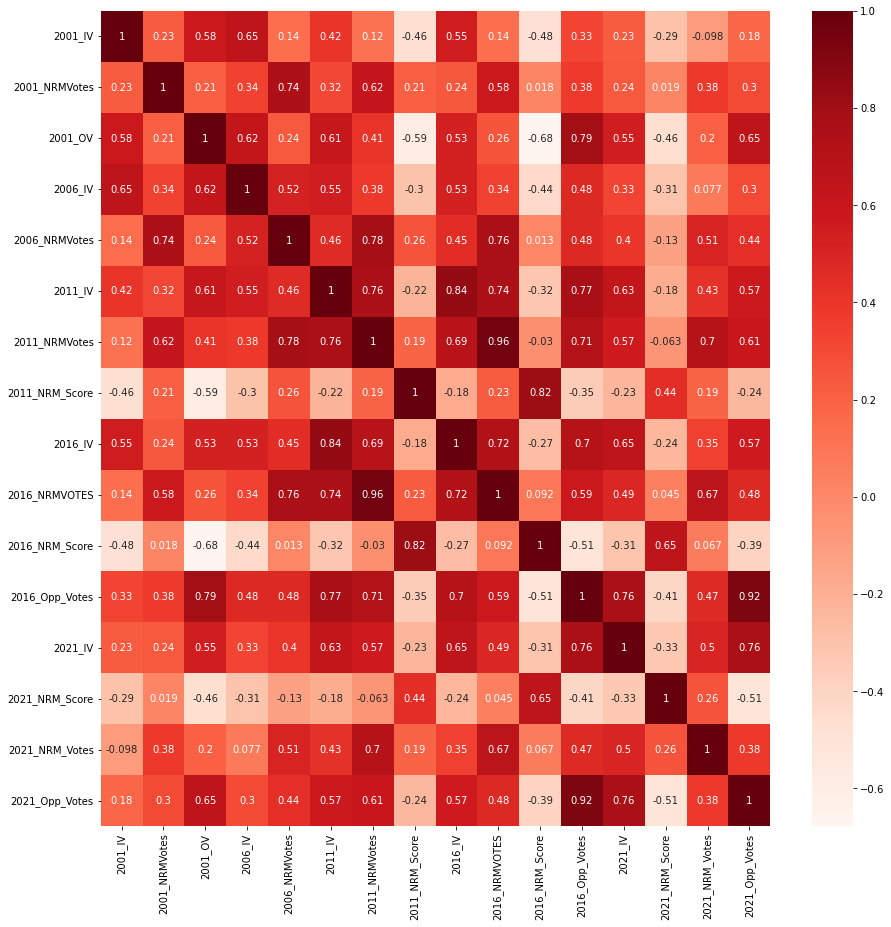

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr(), annot=True, cmap=plt.cm.Reds, )

In [56]:
final_df.columns

Index(['2001_IV', '2001_NRMVotes', '2001_OV', '2006_IV', '2006_NRMVotes',
       '2011_IV', '2011_NRMVotes', '2011_NRM_Score', '2016_IV',
       '2016_NRMVOTES', '2016_NRM_Score', '2016_Opp_Votes', '2021_IV',
       '2021_NRM_Score', '2021_NRM_Votes', '2021_Opp_Votes', 'District'],
      dtype='object')

In [57]:
final_df = final_df.dropna(subset='2016_NRM_Score')

In [59]:
final_df.isna().sum()

2001_IV           59
2001_NRMVotes     59
2001_OV           59
2006_IV           43
2006_NRMVotes     43
2011_IV            0
2011_NRMVotes      0
2011_NRM_Score     0
2016_IV            0
2016_NRMVOTES      0
2016_NRM_Score     0
2016_Opp_Votes     0
2021_IV            0
2021_NRM_Score     0
2021_NRM_Votes     0
2021_Opp_Votes     0
District           0
dtype: int64

In [64]:
final_df.columns

Index(['2001_IV', '2001_NRMVotes', '2001_OV', '2006_IV', '2006_NRMVotes',
       '2011_IV', '2011_NRMVotes', '2011_NRM_Score', '2016_IV',
       '2016_NRMVOTES', '2016_NRM_Score', '2016_Opp_Votes', '2021_IV',
       '2021_NRM_Score', '2021_NRM_Votes', '2021_Opp_Votes', 'District'],
      dtype='object')

In [65]:
dropped = final_df.drop(['2016_Opp_Votes', '2016_NRMVOTES', '2001_OV', '2011_NRM_Score', 
                          '2021_IV', '2021_NRM_Votes', '2021_Opp_Votes' ], axis=1)

<AxesSubplot:>

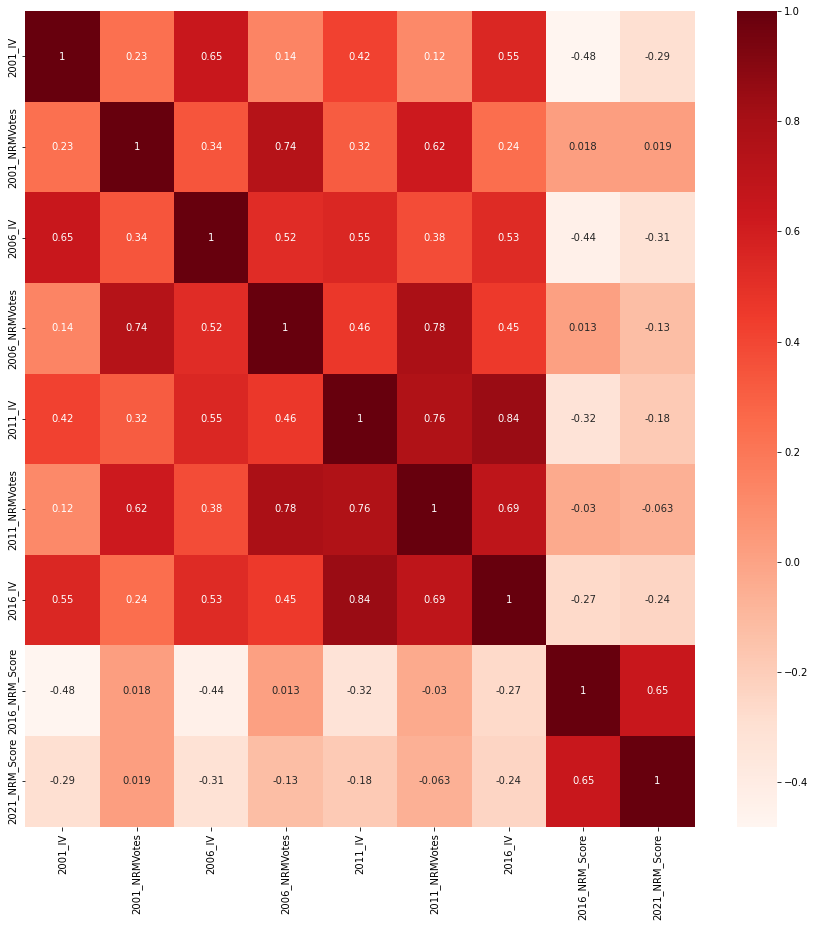

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(dropped.corr(), annot=True, cmap=plt.cm.Reds, )

In [67]:
dropped.columns

Index(['2001_IV', '2001_NRMVotes', '2006_IV', '2006_NRMVotes', '2011_IV',
       '2011_NRMVotes', '2016_IV', '2016_NRM_Score', '2021_NRM_Score',
       'District'],
      dtype='object')

In [9]:
dp = dropped.drop(['2011_IV', '2011_OV','2011_NRMVotes', '2006_NRMVotes','2006_IV' ], axis=1)

<AxesSubplot:>

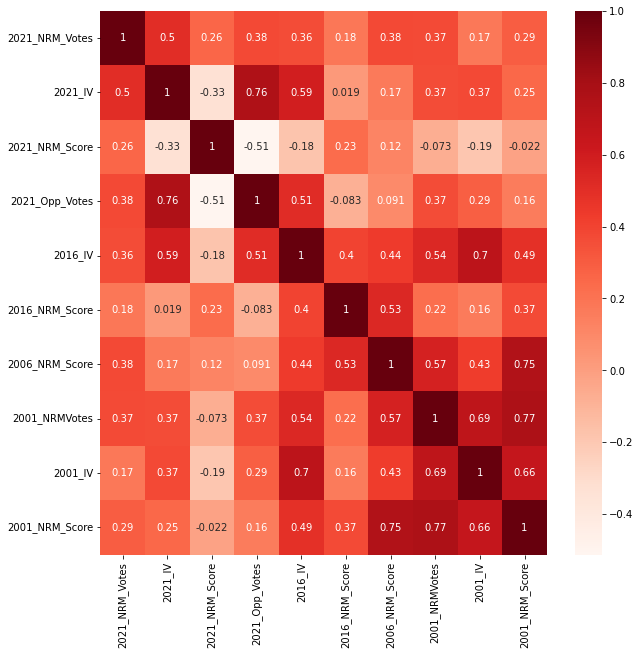

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(dp.corr(), annot=True, cmap=plt.cm.Reds, )

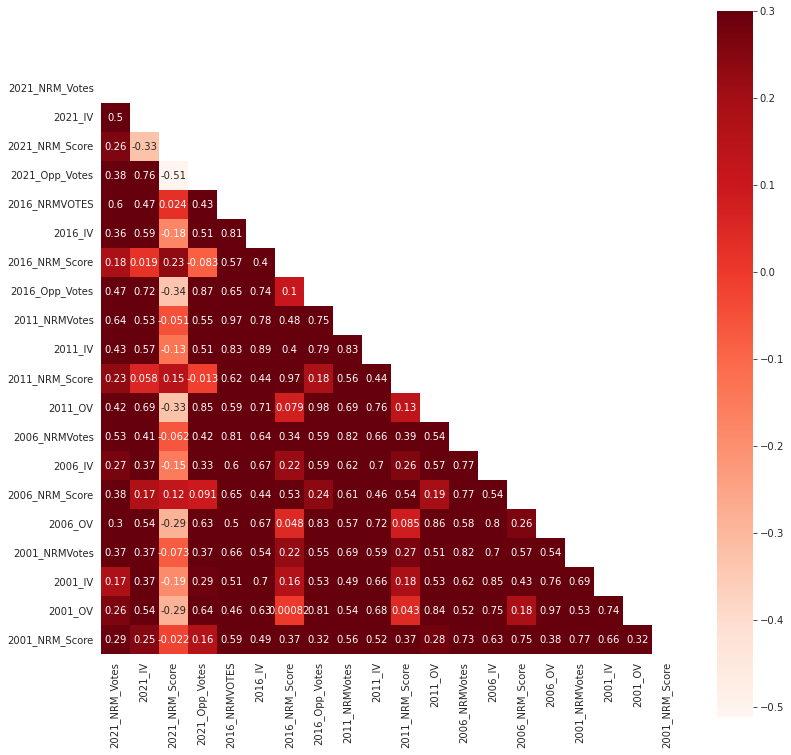

In [11]:
corr = final_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 13))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap=plt.cm.Reds, annot=True )

In [12]:
dp.columns

Index(['District', '2021_NRM_Votes', '2021_IV', '2021_NRM_Score',
       '2021_Opp_Votes', '2016_IV', '2016_NRM_Score', '2006_NRM_Score',
       '2001_NRMVotes', '2001_IV', '2001_NRM_Score'],
      dtype='object')

In [68]:
dropped.columns

Index(['2001_IV', '2001_NRMVotes', '2006_IV', '2006_NRMVotes', '2011_IV',
       '2011_NRMVotes', '2016_IV', '2016_NRM_Score', '2021_NRM_Score',
       'District'],
      dtype='object')

In [80]:
dropped = dropped.sort_values(by=['District'])

In [114]:
dropped = dropped.reset_index(drop=True)

In [115]:
X =dropped.drop(['2021_NRM_Score'], axis=1)
y  = dropped['2021_NRM_Score']

In [92]:
# X = X.sort_values(by=['District'])

In [116]:
X

,2001_IV,2001_NRMVotes,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2016_IV,2016_NRM_Score,District
0,NaN,NaN,NaN,NaN,552.0,16098.0,1134.0,0.800459,ABIM
1,1204.0,14944.0,1990.0,11277.0,2526.0,20918.0,4337.0,0.660997,ADJUMANI
2,NaN,NaN,NaN,NaN,3553.0,26632.0,3016.0,0.599092,AGAGO
3,NaN,NaN,NaN,NaN,2641.0,24171.0,3426.0,0.488209,ALEBTONG
4,NaN,NaN,715.0,7112.0,1171.0,19350.0,2020.0,0.553857,AMOLATAR
...,...,...,...,...,...,...,...,...,...
106,1080.0,58659.0,1477.0,47213.0,1669.0,56053.0,2018.0,0.702691,SSEMBABULE
107,7003.0,89403.0,9856.0,47549.0,5494.0,75820.0,9557.0,0.415721,TORORO
108,4656.0,153719.0,7646.0,129524.0,9306.0,170890.0,16338.0,0.367600,WAKISO
109,2027.0,11541.0,1918.0,19832.0,2562.0,31811.0,3924.0,0.683814,YUMBE


In [117]:
X = X.drop('District', axis=1)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_log_error

In [122]:
X_scaled = StandardScaler().fit_transform(X)
# X_PCA = PCA(n_components=12).fit_transform(X_scaled)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=.3)

In [133]:
X_train.shape,X_test.shape, 

((77, 8), (34, 8))

In [134]:
rgr = SVR()

In [100]:
rgr.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [22]:
rgr.score(X_train, y_train)

0.35451186874635565

In [135]:
gbr = XGBRegressor()

In [136]:
gbr.fit(X_train, y_train);

In [137]:
gbr.score(X_test, y_test)  

0.20621966755702292

In [138]:
gbr.score(X_train, y_train)

0.9999694066628948

In [131]:
y_test

78    0.338874
10    0.525201
4     0.753159
84    0.943628
64    0.857754
68    0.426268
30    0.728798
45    0.841699
96    0.639135
11    0.647767
79    0.873491
80    0.744202
Name: 2021_NRM_Score, dtype: float64

In [139]:
dropped

,2001_IV,2001_NRMVotes,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2016_IV,2016_NRM_Score,2021_NRM_Score,District
0,NaN,NaN,NaN,NaN,552.0,16098.0,1134.0,0.800459,0.773868,ABIM
1,1204.0,14944.0,1990.0,11277.0,2526.0,20918.0,4337.0,0.660997,0.756662,ADJUMANI
2,NaN,NaN,NaN,NaN,3553.0,26632.0,3016.0,0.599092,0.745704,AGAGO
3,NaN,NaN,NaN,NaN,2641.0,24171.0,3426.0,0.488209,0.652728,ALEBTONG
4,NaN,NaN,715.0,7112.0,1171.0,19350.0,2020.0,0.553857,0.753159,AMOLATAR
...,...,...,...,...,...,...,...,...,...,...
106,1080.0,58659.0,1477.0,47213.0,1669.0,56053.0,2018.0,0.702691,0.567148,SSEMBABULE
107,7003.0,89403.0,9856.0,47549.0,5494.0,75820.0,9557.0,0.415721,0.558229,TORORO
108,4656.0,153719.0,7646.0,129524.0,9306.0,170890.0,16338.0,0.367600,0.218175,WAKISO
109,2027.0,11541.0,1918.0,19832.0,2562.0,31811.0,3924.0,0.683814,0.712382,YUMBE


In [31]:
mean_squared_error(y_test, gbr.predict(X_test))

0.03155666261967439

In [289]:
pdf = pd.read_csv('pre_1_6_11.csv')
df = pdf.copy()

<AxesSubplot:>

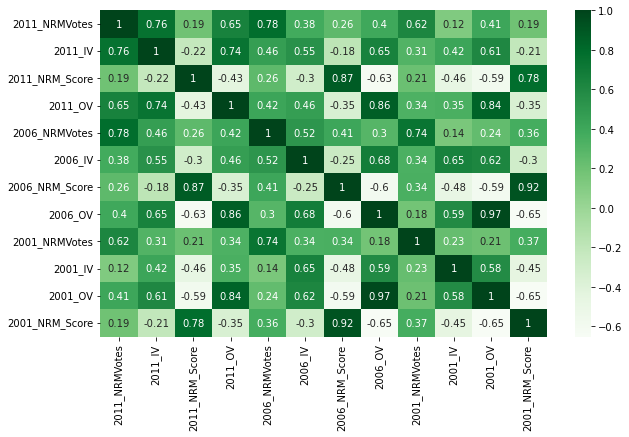

In [287]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Greens)

In [288]:
df.columns

Index(['District', '2011_NRMVotes', '2011_IV', '2011_NRM_Score', '2011_OV',
       '2006_NRMVotes', '2006_IV', '2006_NRM_Score', '2006_OV',
       '2001_NRMVotes', '2001_IV', '2001_OV', '2001_NRM_Score'],
      dtype='object')

In [219]:
df = df.drop(['2006_OV','2006_NRM_Score', '2011_OV', '2001_NRM_Score'], axis=1)

In [222]:
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Greens)

In [221]:
# df.drop(['2001_NRM_Score', '2011_NRMVotes'], axis=1, inplace=True)

In [223]:
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Greens)

In [206]:
# df.drop(['2001_NRMVotes'], axis=1, inplace=True)

In [207]:
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Greens)

In [290]:
df.drop('District', axis=1, inplace=True)

In [302]:
df = df.reindex(sorted(df.columns), axis=1)

In [227]:
df

,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2011_NRM_Score
0,NaN,NaN,NaN,NaN,NaN,552,16098,0.909132
1,1204.0,14944.0,9830.0,1990.0,11277.0,2526,20918,0.648721
2,NaN,NaN,NaN,NaN,NaN,3553,26632,0.595661
3,NaN,NaN,NaN,NaN,NaN,2641,24171,0.485742
4,NaN,NaN,NaN,715.0,7112.0,1171,19350,0.559685
...,...,...,...,...,...,...,...,...
107,1080.0,58659.0,10118.0,1477.0,47213.0,1669,56053,0.813565
108,7003.0,89403.0,70999.0,9856.0,47549.0,5494,75820,0.592858
109,4656.0,153719.0,145117.0,7646.0,129524.0,9306,170890,0.492644
110,2027.0,11541.0,22557.0,1918.0,19832.0,2562,31811,0.589453


<AxesSubplot:>

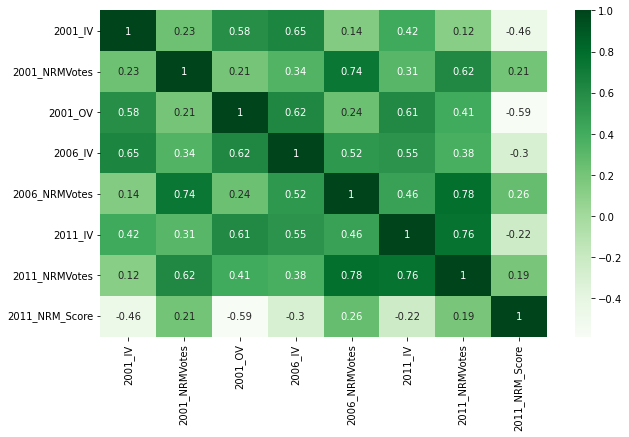

In [228]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Greens)

In [291]:
df2 = pd.read_csv('pre_1_6_11_16.csv')

In [292]:
y = df2['2016_NRM_Score']

In [231]:
y

0      0.800459
1      0.660997
2      0.599092
3      0.488209
4      0.553857
         ...   
107    0.702691
108    0.415721
109    0.367600
110    0.683814
111    0.750437
Name: 2016_NRM_Score, Length: 112, dtype: float64

In [94]:
# df.drop('District', axis=1, inplace=True)

In [232]:
y.shape, df.shape

((112,), (112, 8))

In [293]:
for each in df.columns:
    df[each] = df[each].fillna(0)   

In [301]:
df.corr()

,2011_NRMVotes,2011_IV,2011_NRM_Score,2011_OV,2006_NRMVotes,2006_IV,2006_NRM_Score,2006_OV,2001_NRMVotes,2001_IV,2001_OV,2001_NRM_Score
2011_NRMVotes,1.000000,0.758907,0.187430,0.649227,0.792767,0.528997,0.484072,0.514325,0.652857,0.392752,0.503453,0.449465
2011_IV,0.758907,1.000000,-0.221577,0.743243,0.577653,0.632536,0.265767,0.696629,0.535415,0.606540,0.686333,0.394654
2011_NRM_Score,0.187430,-0.221577,1.000000,-0.432466,0.111524,-0.217816,0.318724,-0.458878,-0.019028,-0.326710,-0.424252,0.058383
2011_OV,0.649227,0.743243,-0.432466,1.000000,0.476628,0.510277,0.052273,0.841098,0.460041,0.465868,0.834821,0.180316
2006_NRMVotes,0.792767,0.577653,0.111524,0.476628,1.000000,0.732786,0.730367,0.528151,0.796320,0.562962,0.474184,0.680888
2006_IV,0.528997,0.632536,-0.217816,0.510277,0.732786,1.000000,0.451463,0.776090,0.659965,0.828682,0.730774,0.571782
2006_NRM_Score,0.484072,0.265767,0.318724,0.052273,0.730367,0.451463,1.000000,0.149499,0.514721,0.327572,0.083696,0.698681
2006_OV,0.514325,0.696629,-0.458878,0.841098,0.528151,0.776090,0.149499,1.000000,0.493607,0.737584,0.965561,0.297065
2001_NRMVotes,0.652857,0.535415,-0.019028,0.460041,0.796320,0.659965,0.514721,0.493607,1.000000,0.651393,0.495204,0.742025
2001_IV,0.392752,0.606540,-0.326710,0.465868,0.562962,0.828682,0.327572,0.737584,0.651393,1.000000,0.723024,0.607487


In [140]:
X_scaled = StandardScaler().fit_transform(df)
X_norm = Normalizer().fit_transform(df)


NameError: name 'df' is not defined

In [304]:
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

In [305]:
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.neighbors import KNeighborsRegressor

In [306]:
xgr = XGBRegressor()
cbr = CatBoostRegressor()
lgr = LGBMRegressor()

rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
exr  = ExtraTreesRegressor()
dt = DecisionTreeRegressor()
lsvr = LinearSVR()
nsvr = NuSVR()
svr = SVR()
knr = KNeighborsRegressor()

In [307]:
xgr.fit(xtrain, ytrain)
cbr.fit(xtrain, ytrain)
lgr.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)
gbr.fit(xtrain, ytrain)
exr.fit(xtrain, ytrain)
dt.fit(xtrain, ytrain)
lsvr.fit(xtrain, ytrain)
nsvr.fit(xtrain, ytrain)
svr.fit(xtrain, ytrain)
knr.fit(xtrain, ytrain)

Learning rate set to 0.027937
0:	learn: 0.1453378	total: 3.55ms	remaining: 3.54s
1:	learn: 0.1431606	total: 6.79ms	remaining: 3.39s
2:	learn: 0.1414914	total: 9.6ms	remaining: 3.19s
3:	learn: 0.1398337	total: 12.7ms	remaining: 3.16s
4:	learn: 0.1380604	total: 15.6ms	remaining: 3.11s
5:	learn: 0.1363932	total: 18.5ms	remaining: 3.06s
6:	learn: 0.1346912	total: 21.3ms	remaining: 3.02s
7:	learn: 0.1329059	total: 24.2ms	remaining: 3s
8:	learn: 0.1313389	total: 27.8ms	remaining: 3.06s
9:	learn: 0.1299818	total: 34.7ms	remaining: 3.44s
10:	learn: 0.1286351	total: 36.3ms	remaining: 3.27s
11:	learn: 0.1275081	total: 45.8ms	remaining: 3.77s
12:	learn: 0.1259341	total: 48.3ms	remaining: 3.67s
13:	learn: 0.1245537	total: 50.3ms	remaining: 3.54s
14:	learn: 0.1229243	total: 52.1ms	remaining: 3.42s
15:	learn: 0.1215185	total: 53.7ms	remaining: 3.31s
16:	learn: 0.1199681	total: 55.1ms	remaining: 3.18s
17:	learn: 0.1186067	total: 57.1ms	remaining: 3.11s
18:	learn: 0.1173363	total: 58.2ms	remaining: 3s

225:	learn: 0.0380460	total: 324ms	remaining: 1.11s
226:	learn: 0.0379011	total: 326ms	remaining: 1.11s
227:	learn: 0.0377130	total: 327ms	remaining: 1.11s
228:	learn: 0.0376583	total: 329ms	remaining: 1.11s
229:	learn: 0.0376113	total: 329ms	remaining: 1.1s
230:	learn: 0.0374834	total: 331ms	remaining: 1.1s
231:	learn: 0.0373865	total: 332ms	remaining: 1.1s
232:	learn: 0.0373063	total: 333ms	remaining: 1.1s
233:	learn: 0.0371832	total: 335ms	remaining: 1.1s
234:	learn: 0.0371086	total: 337ms	remaining: 1.1s
235:	learn: 0.0369929	total: 338ms	remaining: 1.09s
236:	learn: 0.0369024	total: 340ms	remaining: 1.09s
237:	learn: 0.0368236	total: 341ms	remaining: 1.09s
238:	learn: 0.0367510	total: 343ms	remaining: 1.09s
239:	learn: 0.0366468	total: 344ms	remaining: 1.09s
240:	learn: 0.0365525	total: 346ms	remaining: 1.09s
241:	learn: 0.0363018	total: 347ms	remaining: 1.09s
242:	learn: 0.0362153	total: 349ms	remaining: 1.08s
243:	learn: 0.0361660	total: 350ms	remaining: 1.08s
244:	learn: 0.0360

481:	learn: 0.0201645	total: 642ms	remaining: 690ms
482:	learn: 0.0201152	total: 644ms	remaining: 689ms
483:	learn: 0.0200224	total: 646ms	remaining: 688ms
484:	learn: 0.0199338	total: 647ms	remaining: 687ms
485:	learn: 0.0198474	total: 648ms	remaining: 686ms
486:	learn: 0.0197964	total: 650ms	remaining: 684ms
487:	learn: 0.0197467	total: 651ms	remaining: 683ms
488:	learn: 0.0196237	total: 652ms	remaining: 682ms
489:	learn: 0.0195044	total: 654ms	remaining: 680ms
490:	learn: 0.0194561	total: 655ms	remaining: 679ms
491:	learn: 0.0193404	total: 657ms	remaining: 678ms
492:	learn: 0.0192559	total: 658ms	remaining: 677ms
493:	learn: 0.0192091	total: 660ms	remaining: 676ms
494:	learn: 0.0191817	total: 661ms	remaining: 675ms
495:	learn: 0.0191015	total: 663ms	remaining: 673ms
496:	learn: 0.0190576	total: 664ms	remaining: 672ms
497:	learn: 0.0190067	total: 665ms	remaining: 671ms
498:	learn: 0.0189763	total: 667ms	remaining: 670ms
499:	learn: 0.0189578	total: 668ms	remaining: 668ms
500:	learn: 

692:	learn: 0.0112456	total: 959ms	remaining: 425ms
693:	learn: 0.0112391	total: 961ms	remaining: 424ms
694:	learn: 0.0112333	total: 963ms	remaining: 422ms
695:	learn: 0.0111951	total: 965ms	remaining: 421ms
696:	learn: 0.0111447	total: 966ms	remaining: 420ms
697:	learn: 0.0110946	total: 968ms	remaining: 419ms
698:	learn: 0.0110832	total: 970ms	remaining: 418ms
699:	learn: 0.0110720	total: 972ms	remaining: 417ms
700:	learn: 0.0110641	total: 974ms	remaining: 415ms
701:	learn: 0.0110563	total: 976ms	remaining: 414ms
702:	learn: 0.0110172	total: 977ms	remaining: 413ms
703:	learn: 0.0109943	total: 979ms	remaining: 412ms
704:	learn: 0.0109717	total: 981ms	remaining: 410ms
705:	learn: 0.0109483	total: 983ms	remaining: 409ms
706:	learn: 0.0109406	total: 984ms	remaining: 408ms
707:	learn: 0.0108805	total: 986ms	remaining: 407ms
708:	learn: 0.0108514	total: 988ms	remaining: 406ms
709:	learn: 0.0108406	total: 990ms	remaining: 404ms
710:	learn: 0.0108077	total: 992ms	remaining: 403ms
711:	learn: 

917:	learn: 0.0063790	total: 1.3s	remaining: 116ms
918:	learn: 0.0063579	total: 1.3s	remaining: 115ms
919:	learn: 0.0063541	total: 1.3s	remaining: 113ms
920:	learn: 0.0063335	total: 1.3s	remaining: 112ms
921:	learn: 0.0063196	total: 1.3s	remaining: 110ms
922:	learn: 0.0063159	total: 1.31s	remaining: 109ms
923:	learn: 0.0063022	total: 1.31s	remaining: 108ms
924:	learn: 0.0062985	total: 1.31s	remaining: 106ms
925:	learn: 0.0062744	total: 1.31s	remaining: 105ms
926:	learn: 0.0062535	total: 1.31s	remaining: 103ms
927:	learn: 0.0062384	total: 1.31s	remaining: 102ms
928:	learn: 0.0062362	total: 1.31s	remaining: 100ms
929:	learn: 0.0062214	total: 1.32s	remaining: 99.1ms
930:	learn: 0.0062083	total: 1.32s	remaining: 97.7ms
931:	learn: 0.0062061	total: 1.32s	remaining: 96.3ms
932:	learn: 0.0061829	total: 1.32s	remaining: 94.8ms
933:	learn: 0.0061701	total: 1.32s	remaining: 93.4ms
934:	learn: 0.0061517	total: 1.32s	remaining: 92ms
935:	learn: 0.0061291	total: 1.32s	remaining: 90.6ms
936:	learn: 

C:\Users\Sulaiman\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNeighborsRegressor()

In [310]:
print(xgr.score(xtrain, ytrain))
print(cbr.score(xtrain, ytrain))
print(lgr.score(xtrain, ytrain))
print(rf.score(xtrain, ytrain))
print(gbr.score(xtrain, ytrain))
print(exr.score(xtrain, ytrain))
print(dt.score(xtrain, ytrain))
print(lsvr.score(xtrain, ytrain))
print(nsvr.score(xtrain, ytrain))
print(svr.score(xtrain, ytrain))
print(knr.score(xtrain, ytrain))

0.999959979144135
0.9987166623832179
0.848880165143262
0.9508672484805439
0.9957064267402654
1.0
1.0
0.7104478501424212
0.8559232079159826
0.7437893633158934
0.7498085404723349


In [311]:
print(xgr.score(xtest, ytest))
print(cbr.score(xtest, ytest))
print(lgr.score(xtest, ytest))
print(rf.score(xtest, ytest))
print(gbr.score(xtest, ytest))
print(exr.score(xtest, ytest))
print(dt.score(xtest, ytest))
print(lsvr.score(xtest, ytest))
print(nsvr.score(xtest, ytest))
print(svr.score(xtest, ytest))
print(knr.score(xtest, ytest))

0.8831251541777246
0.8689790353599551
0.7994490218286296
0.8465833349175439
0.8899110174626979
0.8668186861988008
0.8593245775107123
0.5955213275022715
0.6678929917105285
0.5681128714788803
0.6818364864586675


In [312]:
df2

,Unnamed: 0,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2011_NRM_Score,2016_IV,2016_NRMVOTES,2016_NRM_Score,2016_Opp_Votes,District
0,0,NaN,NaN,NaN,NaN,NaN,552,16098,0.909132,1134,17109,0.800459,4265,ABIM
1,1,1204.0,14944.0,9830.0,1990.0,11277.0,2526,20918,0.648721,4337,26346,0.660997,13512,ADJUMANI
2,2,NaN,NaN,NaN,NaN,NaN,3553,26632,0.595661,3016,35501,0.599092,23757,AGAGO
3,3,NaN,NaN,NaN,NaN,NaN,2641,24171,0.485742,3426,31592,0.488209,33118,ALEBTONG
4,4,NaN,NaN,NaN,715.0,7112.0,1171,19350,0.559685,2020,24789,0.553857,19968,AMOLATAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,1080.0,58659.0,10118.0,1477.0,47213.0,1669,56053,0.813565,2018,51749,0.702691,21895,SSEMBABULE
108,108,7003.0,89403.0,70999.0,9856.0,47549.0,5494,75820,0.592858,9557,64882,0.415721,91189,TORORO
109,109,4656.0,153719.0,145117.0,7646.0,129524.0,9306,170890,0.492644,16338,172129,0.367600,296122,WAKISO
110,110,2027.0,11541.0,22557.0,1918.0,19832.0,2562,31811,0.589453,3924,44837,0.683814,20732,YUMBE


In [314]:
df2.columns

Index(['Unnamed: 0', '2001_IV', '2001_NRMVotes', '2001_OV', '2006_IV',
       '2006_NRMVotes', '2011_IV', '2011_NRMVotes', '2011_NRM_Score',
       '2016_IV', '2016_NRMVOTES', '2016_NRM_Score', '2016_Opp_Votes',
       'District'],
      dtype='object')

In [315]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

<AxesSubplot:>

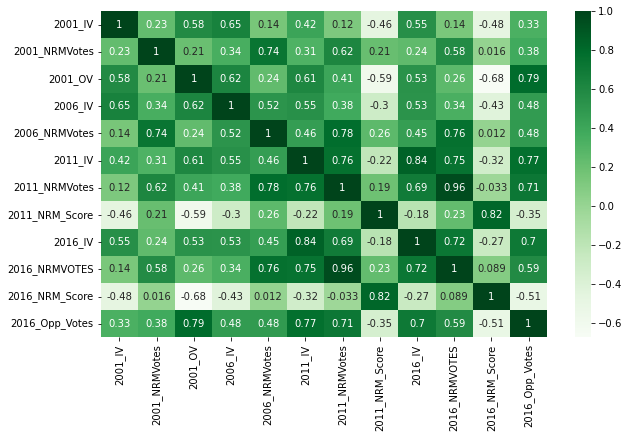

In [316]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot=True, cmap=plt.cm.Greens)

In [317]:
df2.columns

Index(['2001_IV', '2001_NRMVotes', '2001_OV', '2006_IV', '2006_NRMVotes',
       '2011_IV', '2011_NRMVotes', '2011_NRM_Score', '2016_IV',
       '2016_NRMVOTES', '2016_NRM_Score', '2016_Opp_Votes', 'District'],
      dtype='object')

In [318]:
df2.drop(['2011_NRMVotes'], axis=1, inplace=True)

<AxesSubplot:>

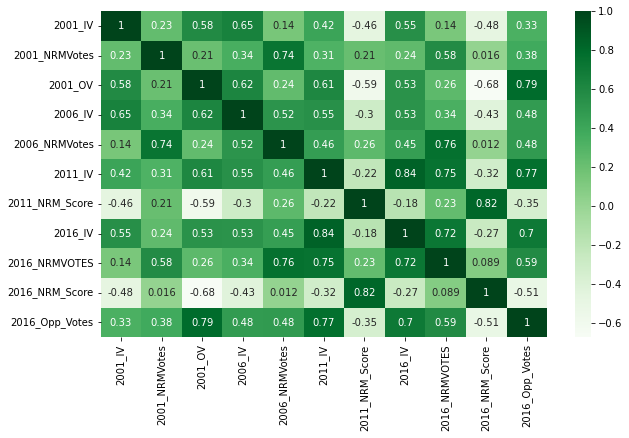

In [319]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot=True, cmap=plt.cm.Greens)

In [320]:
df2.drop(['2011_IV'], axis=1, inplace=True)

<AxesSubplot:>

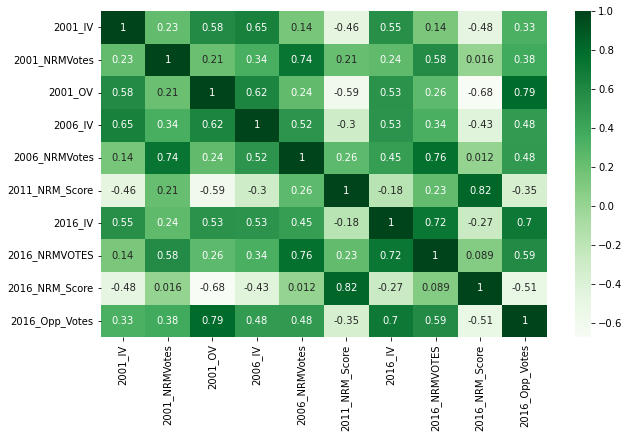

In [351]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot=True, cmap=plt.cm.Greens)

## Predicting Presidential score

In [175]:
df3 = pd.read_csv('pre_1_6_11_16_21.csv')

In [176]:
df3 = df3.reindex(sorted(df3.columns), axis=1)

In [177]:
df3

,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2011_NRM_Score,2016_IV,2016_NRMVOTES,2016_NRM_Score,2016_Opp_Votes,2021_IV,2021_NRM_Score,2021_NRM_Votes,2021_Opp_Votes,District
0,5604.0,37133.0,133372.0,10391.0,25865.0,3087.0,41712.0,0.581976,5023.0,56371.0,0.562624,43822.0,3161,0.610656,31908,20344,APAC
1,9807.0,72393.0,112419.0,11022.0,68560.0,9207.0,85005.0,0.550618,20736.0,114868.0,0.577084,84181.0,2263,0.704769,23824,9980,ARUA
2,1112.0,39676.0,3451.0,3019.0,45651.0,2401.0,45909.0,0.869439,4054.0,61553.0,0.855925,10361.0,2145,0.730191,52408,19365,BUNDIBUGYO
3,3427.0,212540.0,46387.0,8055.0,176909.0,1907.0,51894.0,0.757068,2797.0,61837.0,0.687284,28136.0,2674,0.785594,66572,18169,BUSHENYI
4,6076.0,15320.0,117410.0,5631.0,16866.0,5340.0,24590.0,0.290353,5694.0,31391.0,0.327351,64503.0,2055,0.503906,9997,9842,GULU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3128,0.394287,29717,45652,MBALE CITY
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4497,0.511125,24718,23642,TEREGO
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2140,0.579749,30271,21943,LIRA CITY
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1450,0.570690,19751,14858,HOIMA CITY


In [178]:
df3.isna().sum()

2001_IV           94
2001_NRMVotes     94
2001_OV           94
2006_IV           78
2006_NRMVotes     78
2011_IV           35
2011_NRMVotes     35
2011_NRM_Score    35
2016_IV           35
2016_NRMVOTES     35
2016_NRM_Score    35
2016_Opp_Votes    35
2021_IV            0
2021_NRM_Score     0
2021_NRM_Votes     0
2021_Opp_Votes     0
District           0
dtype: int64

In [179]:
df3.columns[:-1]

Index(['2001_IV', '2001_NRMVotes', '2001_OV', '2006_IV', '2006_NRMVotes',
       '2011_IV', '2011_NRMVotes', '2011_NRM_Score', '2016_IV',
       '2016_NRMVOTES', '2016_NRM_Score', '2016_Opp_Votes', '2021_IV',
       '2021_NRM_Score', '2021_NRM_Votes', '2021_Opp_Votes'],
      dtype='object')

In [180]:
# df3.drop(['2001_IV', '2001_NRMVotes', '2001_OV', '2006_IV', '2006_NRMVotes'], axis=1, inplace=True)

In [181]:
df3.columns

Index(['2001_IV', '2001_NRMVotes', '2001_OV', '2006_IV', '2006_NRMVotes',
       '2011_IV', '2011_NRMVotes', '2011_NRM_Score', '2016_IV',
       '2016_NRMVOTES', '2016_NRM_Score', '2016_Opp_Votes', '2021_IV',
       '2021_NRM_Score', '2021_NRM_Votes', '2021_Opp_Votes', 'District'],
      dtype='object')

In [182]:
df3.isna().sum()

2001_IV           94
2001_NRMVotes     94
2001_OV           94
2006_IV           78
2006_NRMVotes     78
2011_IV           35
2011_NRMVotes     35
2011_NRM_Score    35
2016_IV           35
2016_NRMVOTES     35
2016_NRM_Score    35
2016_Opp_Votes    35
2021_IV            0
2021_NRM_Score     0
2021_NRM_Votes     0
2021_Opp_Votes     0
District           0
dtype: int64

In [183]:
for each in df3.columns[:-1]:
    df3[each] = df3[each].fillna(df3[each].mean())

In [184]:
df3

,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2011_NRM_Score,2016_IV,2016_NRMVOTES,2016_NRM_Score,2016_Opp_Votes,2021_IV,2021_NRM_Score,2021_NRM_Votes,2021_Opp_Votes,District
0,5604.000000,37133.000000,133372.000000,10391.0,25865.000000,3087.000000,41712.000000,0.581976,5023.000000,56371.000000,0.562624,43822.00000,3161,0.610656,31908,20344,APAC
1,9807.000000,72393.000000,112419.000000,11022.0,68560.000000,9207.000000,85005.000000,0.550618,20736.000000,114868.000000,0.577084,84181.00000,2263,0.704769,23824,9980,ARUA
2,1112.000000,39676.000000,3451.000000,3019.0,45651.000000,2401.000000,45909.000000,0.869439,4054.000000,61553.000000,0.855925,10361.00000,2145,0.730191,52408,19365,BUNDIBUGYO
3,3427.000000,212540.000000,46387.000000,8055.0,176909.000000,1907.000000,51894.000000,0.757068,2797.000000,61837.000000,0.687284,28136.00000,2674,0.785594,66572,18169,BUSHENYI
4,6076.000000,15320.000000,117410.000000,5631.0,16866.000000,5340.000000,24590.000000,0.290353,5694.000000,31391.000000,0.327351,64503.00000,2055,0.503906,9997,9842,GULU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,3487.653846,95519.711538,42442.480769,4310.5,59566.411765,2977.396396,48278.522523,0.698806,4247.855856,53157.567568,0.641486,34444.72973,3128,0.394287,29717,45652,MBALE CITY
142,3487.653846,95519.711538,42442.480769,4310.5,59566.411765,2977.396396,48278.522523,0.698806,4247.855856,53157.567568,0.641486,34444.72973,4497,0.511125,24718,23642,TEREGO
143,3487.653846,95519.711538,42442.480769,4310.5,59566.411765,2977.396396,48278.522523,0.698806,4247.855856,53157.567568,0.641486,34444.72973,2140,0.579749,30271,21943,LIRA CITY
144,3487.653846,95519.711538,42442.480769,4310.5,59566.411765,2977.396396,48278.522523,0.698806,4247.855856,53157.567568,0.641486,34444.72973,1450,0.570690,19751,14858,HOIMA CITY


In [185]:
# df3.dropna(0, inplace=True)

In [186]:
df3.drop(['2021_IV', '2021_NRM_Votes', '2021_Opp_Votes', 'District'], axis=1, inplace=True)

## Feature correlation

<AxesSubplot:>

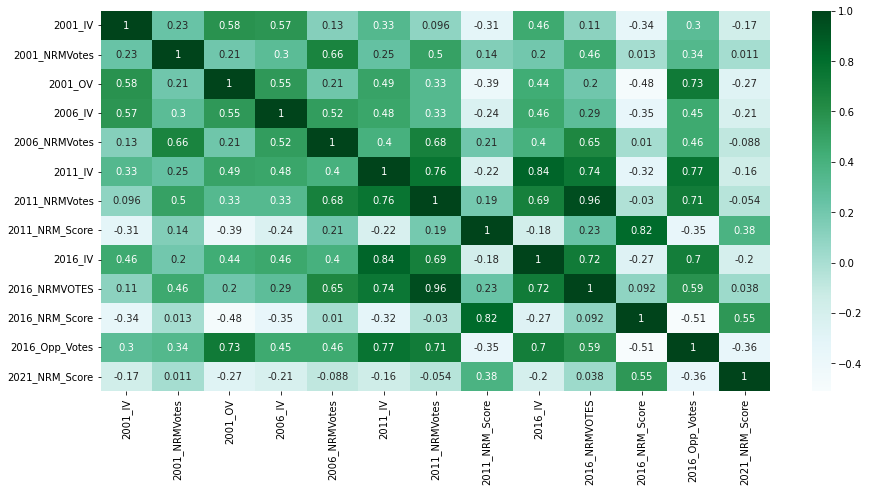

In [187]:
plt.figure(figsize=(15,7))
sns.heatmap(df3.corr(), annot=True, cmap=plt.cm.BuGn)

In [87]:
# df3.drop(['2011_NRMVotes', '2011_IV', '2016_NRM_Score'], axis=1, inplace=True)

In [88]:
# plt.figure(figsize=(15,7))
# sns.heatmap(df3.corr(), annot=True, cmap=plt.cm.BuGn)

In [89]:
# df3.drop(['2001_IV', '2011_NRMVotes'], axis=1, inplace=True)

In [179]:
# plt.figure(figsize=(15,7))
# sns.heatmap(df3.corr(), annot=True, cmap=plt.cm.BuGn)

In [91]:
# df3.drop(['2016_Opp_Votes', '2006_NRMVotes'], axis=1, inplace=True)

In [178]:
# plt.figure(figsize=(15,7))
# sns.heatmap(df3.corr(), annot=True, cmap=plt.cm.BuGn)

In [188]:
df3

,2001_IV,2001_NRMVotes,2001_OV,2006_IV,2006_NRMVotes,2011_IV,2011_NRMVotes,2011_NRM_Score,2016_IV,2016_NRMVOTES,2016_NRM_Score,2016_Opp_Votes,2021_NRM_Score
0,5604.000000,37133.000000,133372.000000,10391.0,25865.000000,3087.000000,41712.000000,0.581976,5023.000000,56371.000000,0.562624,43822.00000,0.610656
1,9807.000000,72393.000000,112419.000000,11022.0,68560.000000,9207.000000,85005.000000,0.550618,20736.000000,114868.000000,0.577084,84181.00000,0.704769
2,1112.000000,39676.000000,3451.000000,3019.0,45651.000000,2401.000000,45909.000000,0.869439,4054.000000,61553.000000,0.855925,10361.00000,0.730191
3,3427.000000,212540.000000,46387.000000,8055.0,176909.000000,1907.000000,51894.000000,0.757068,2797.000000,61837.000000,0.687284,28136.00000,0.785594
4,6076.000000,15320.000000,117410.000000,5631.0,16866.000000,5340.000000,24590.000000,0.290353,5694.000000,31391.000000,0.327351,64503.00000,0.503906
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,3487.653846,95519.711538,42442.480769,4310.5,59566.411765,2977.396396,48278.522523,0.698806,4247.855856,53157.567568,0.641486,34444.72973,0.394287
142,3487.653846,95519.711538,42442.480769,4310.5,59566.411765,2977.396396,48278.522523,0.698806,4247.855856,53157.567568,0.641486,34444.72973,0.511125
143,3487.653846,95519.711538,42442.480769,4310.5,59566.411765,2977.396396,48278.522523,0.698806,4247.855856,53157.567568,0.641486,34444.72973,0.579749
144,3487.653846,95519.711538,42442.480769,4310.5,59566.411765,2977.396396,48278.522523,0.698806,4247.855856,53157.567568,0.641486,34444.72973,0.570690


In [190]:
df3.to_csv('df3.csv', index=False)

In [202]:
df3 = pd.read_csv('df3.csv')

y2 = df3['2021_NRM_Score']
X = df3.drop('2021_NRM_Score', axis=1)

x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=7)
x_pca = pca.fit_transform(x_scaled)

xtrain, xtest, ytrain, ytest = train_test_split(x_pca, y2, test_size=0.2, random_state=42)

# xgr = XGBRegressor()
# # cbr = CatBoostRegressor()
# lgr = LGBMRegressor()

# rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
# exr  = ExtraTreesRegressor()
# dt = DecisionTreeRegressor()
# lsvr = LinearSVR()
# nsvr = NuSVR()
# svr = SVR()
# knr = KNeighborsRegressor()

# xgr = xgr.fit(xtrain, ytrain)
# # cbr.fit(xtrain, ytrain)
# lgr = lgr.fit(xtrain, ytrain)
# rf = rf.fit(xtrain, ytrain)
gbr = gbr.fit(xtrain, ytrain)
# exr = exr.fit(xtrain, ytrain)
# dt = dt.fit(xtrain, ytrain)
# lsvr.fit(xtrain, ytrain)
# nsvr = nsvr.fit(xtrain, ytrain)
# svr = svr.fit(xtrain, ytrain)
# knr = knr.fit(xtrain, ytrain)

# print(xgr.score(xtrain, ytrain))
# # print(cbr.score(xtrain, ytrain))
# print(lgr.score(xtrain, ytrain))
# print(rf.score(xtrain, ytrain))
# print(gbr.score(xtrain, ytrain))
# print(exr.score(xtrain, ytrain))
# print(dt.score(xtrain, ytrain))
# print(lsvr.score(xtrain, ytrain))
# print(nsvr.score(xtrain, ytrain))
# print(svr.score(xtrain, ytrain))
# print(knr.score(xtrain, ytrain))
import pickle

pickle.dump(gbr, open('model.pkl', 'wb'))

## Testing

In [200]:
# print('XGBRegressor score:', xgr.score(xtest, ytest))
# # print('CatBoostRegressor score: ', cbr.score(xtest, ytest))
# print('LGBMRegressor score: ', lgr.score(xtest, ytest))
# print('RandomFrestRegressor score: ', rf.score(xtest, ytest))
print('GradientBoostingRegressor score: ', gbr.score(xtest, ytest))
# print('ExtraTreesRegressor score: ', exr.score(xtest, ytest))
# print('DecisionTreeRegressor score: ', dt.score(xtest, ytest))
# print('LinearSVR score :', lsvr.score(xtest, ytest))
# print('NuSVR score : ', nsvr.score(xtest, ytest))
# print('SVR: ', svr.score(xtest, ytest))
# print('KneighborsRegressor score: ', knr.score(xtest, ytest))

GradientBoostingRegressor score:  0.4677980528550544


In [201]:
# print(mean_squared_error(ytest, lsvr.predict(xtest)))
# print(mean_squared_error(ytest, xgr.predict(xtest)))
# # print(mean_squared_error(ytest, cbr.predict(xtest)))
# print(mean_squared_error(ytest, rf.predict(xtest)))
# print(mean_squared_error(ytest, dt.predict(xtest)))
# print(mean_squared_error(ytest, exr.predict(xtest)))
# # print(mean_squared_error(ytt, .predict(xtt)))

import pickle

pickle.dump(gbr, open('model.pkl', 'wb'))

In [143]:
test_df = pd.DataFrame({'True Score': ytest, 'Predicted Scores': exr.predict(xtest)})

In [120]:
test_df

,True Score,Predicted Scores
45,0.940206,0.857693
97,0.294261,0.571467
27,0.873491,0.811382
19,0.831832,0.822190
42,0.724976,0.650523
120,0.671677,0.659999
29,0.264653,0.585754
80,0.975775,0.805354
66,0.671694,0.544471
18,0.527266,0.602204


## Model evaluation
### Cross validation

In [42]:
cross_val_score(lsvr, x_pca, y2, cv=5)

/home/sulaiman/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sulaiman/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sulaiman/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sulaiman/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sulaiman/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([ 0.01309645,  0.17178692,  0.20637795,  0.04929339, -0.04567481])

## Pickling the best model

In [168]:
import pickle

pickle.dump(exr, open('model.pkl', 'wb'))

In [28]:
df3.to_csv('correct_df.csv', index=False)